# Definition 1

In [1]:
from keras.preprocessing.text import Tokenizer
import codecs
from keras.preprocessing.sequence import pad_sequences
import numpy as np
import nltk
from konlpy.tag import Okt
from tqdm import tqdm

# train set
name = "1"
filename1 = './new_data/definition'+name+'_spynorth_scaling_trust.txt'
filename2 = './new_data/definition'+name+'_spynorth_scaling_untrust.txt'
filename3 = './new_data/definition'+name+'_intistranger_scaling_trust.txt'
filename4 = './new_data/definition'+name+'_intistranger_scaling_untrust.txt'
filename5 = './new_data/definition'+name+'_assassin_scaling_trust.txt'
filename6 = './new_data/definition'+name+'_assassin_scaling_untrust.txt'
filename7 = './new_data/definition'+name+'_1987_scaling_trust.txt'
filename8 = './new_data/definition'+name+'_1987_scaling_untrust.txt'
filename9 = './new_data/definition'+name+'_taxi_scaling_trust.txt'
filename10 = './new_data/definition'+name+'_taxi_scaling_untrust.txt'


with codecs.open(filename1, 'r', encoding='utf-8') as f:
    lines1 = f.readlines()
with codecs.open(filename2, 'r', encoding='utf-8') as f:
    lines2 = f.readlines()
with codecs.open(filename3, 'r', encoding='utf-8') as f:
    lines3 = f.readlines()
with codecs.open(filename4, 'r', encoding='utf-8') as f:
    lines4 = f.readlines()
with codecs.open(filename5, 'r', encoding='utf-8') as f:
    lines5 = f.readlines()
with codecs.open(filename6, 'r', encoding='utf-8') as f:
    lines6 = f.readlines()
with codecs.open(filename7, 'r', encoding='utf-8') as f:
    lines7 = f.readlines()
with codecs.open(filename8, 'r', encoding='utf-8') as f:
    lines8 = f.readlines()
with codecs.open(filename9, 'r', encoding='utf-8') as f:
    lines9 = f.readlines()
with codecs.open(filename10, 'r', encoding='utf-8') as f:
    lines10 = f.readlines()




# test set


with codecs.open('./new_data/definition'+name+'_spynorth_test_t.txt', 'r', 'utf-8') as f:
    test1 = f.readlines()
with codecs.open('./new_data/definition'+name+'_spynorth_test_ut.txt', 'r', 'utf-8') as f:
    test2 = f.readlines()
with codecs.open('./new_data/definition'+name+'_intistranger_test_t.txt', 'r', encoding='utf-8') as f:
    test3 = f.readlines()
with codecs.open('./new_data/definition'+name+'_intistranger_test_ut.txt', 'r', encoding='utf-8') as f:
    test4 = f.readlines()
with codecs.open('./new_data/definition'+name+'_assassin_test_t.txt', 'r', encoding='utf-8') as f:
    test5 = f.readlines()
with codecs.open('./new_data/definition'+name+'_assassin_test_ut.txt', 'r', encoding='utf-8') as f:
    test6 = f.readlines()
with codecs.open('./new_data/definition'+name+'_1987_test_t.txt', 'r', encoding='utf-8') as f:
    test7 = f.readlines()
with codecs.open('./new_data/definition'+name+'_1987_test_ut.txt', 'r', encoding='utf-8') as f:
    test8 = f.readlines()
with codecs.open('./new_data/definition'+name+'_taxi_test_t.txt', 'r', encoding='utf-8') as f:
    test9 = f.readlines()
with codecs.open('./new_data/definition'+name+'_taxi_test_ut.txt', 'r', encoding='utf-8') as f:
    test10 = f.readlines()

    



## 공작

In [3]:
lines_t = lines1
lines_ut = lines2
test_t = test1
test_ut = test2

lines_ = []
test_lines_ = []
for line in lines_t:
    text = line.split(",")[3]
    lines_.append(text.strip())

    
    

for line in lines_ut:
    text = line.split(",")[3]
    lines_.append(text.strip())


for line in test_t:
    text = line.split(",")[3]
    test_lines_.append(text.strip())

    
for line in test_ut:
    text = line.split(",")[3]
    test_lines_.append(text.strip())

train_labels = [] # train 데이터 label
test_labels = [] # test 데이터 label
for i in range(len(lines_t)):
    train_labels.append(0)
for j in range(len(lines_ut)):
    train_labels.append(1)
for i in range(len(test_t)):
    test_labels.append(0)
for j in range(len(test_ut)):
    test_labels.append(1)
    
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np

okt = Okt()
x_train = []
x_test = []
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

for sentence in tqdm(lines_):
    tokenized_sentence = okt.morphs(sentence, stem=True) # 토큰화
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    x_train.append(stopwords_removed_sentence)

for sentence in tqdm(test_lines_):
    tokenized_sentence = okt.morphs(sentence, stem=True) # 토큰화
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    x_test.append(stopwords_removed_sentence)

maxlen = 1000  # 100개 단어 이후는 버립니다
training_samples = 200  # 훈련 샘플은 200 -> 200개입니다
validation_samples = 10000  # 검증 샘플은 10,000개입니다
max_words = 10000  # 데이터셋에서 가장 빈도 높은 10,000개의 단어만 사용합니다
# train 토큰화
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(x_train)
sequences = tokenizer.texts_to_sequences(x_train)

word_index = tokenizer.word_index
train = pad_sequences(sequences,maxlen=maxlen)

# test 토큰화
tokenizer2 = Tokenizer(num_words=max_words)
tokenizer2.fit_on_texts(x_test)
sequences2 = tokenizer2.texts_to_sequences(x_test)

word_index2 = tokenizer2.word_index
test = pad_sequences(sequences2,maxlen=maxlen)

train_labels = np.asarray(train_labels)
test_labels = np.asarray(test_labels)

100%|█████████████████████████████████████████████████████████████████████████████| 1600/1600 [00:10<00:00, 156.60it/s]


### simpleRNN

리뷰의 최대 길이 : 120436
리뷰의 평균 길이 : 773.285


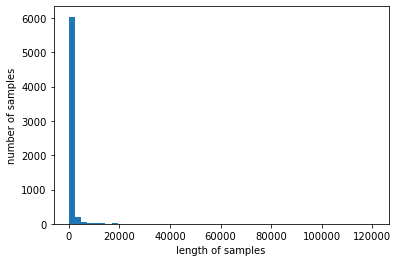

In [19]:
print('리뷰의 최대 길이 :',max(len(review) for review in x_train))
print('리뷰의 평균 길이 :',sum(map(len, x_train))/len(x_train))
plt.hist([len(review) for review in x_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

리뷰의 최대 길이 : 53268
리뷰의 평균 길이 : 640.85375


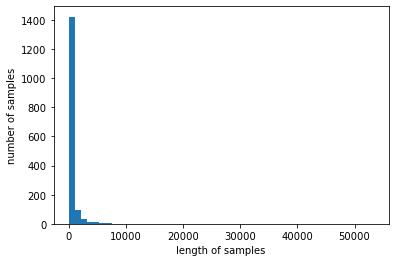

In [20]:
print('리뷰의 최대 길이 :',max(len(review) for review in x_test))
print('리뷰의 평균 길이 :',sum(map(len, x_test))/len(x_test))
plt.hist([len(review) for review in x_test], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

Epoch 1/10
40/40 [==============================] - 12s 263ms/step - loss: 0.6767 - acc: 0.5877 - val_loss: 0.8731 - val_acc: 0.0172
Epoch 2/10
40/40 [==============================] - 12s 293ms/step - loss: 0.6202 - acc: 0.6551 - val_loss: 0.9080 - val_acc: 0.0484
Epoch 3/10
40/40 [==============================] - 13s 328ms/step - loss: 0.5735 - acc: 0.7234 - val_loss: 0.9354 - val_acc: 0.0883
Epoch 4/10
40/40 [==============================] - 13s 321ms/step - loss: 0.5158 - acc: 0.7625 - val_loss: 0.9382 - val_acc: 0.1773
Epoch 5/10
40/40 [==============================] - 13s 326ms/step - loss: 0.4430 - acc: 0.8357 - val_loss: 0.9379 - val_acc: 0.2492
Epoch 6/10
40/40 [==============================] - 13s 315ms/step - loss: 0.3452 - acc: 0.8873 - val_loss: 0.9516 - val_acc: 0.3570
Epoch 7/10
40/40 [==============================] - 12s 294ms/step - loss: 0.3835 - acc: 0.8150 - val_loss: 0.9773 - val_acc: 0.3820
Epoch 8/10
40/40 [==============================] - 14s 343ms/step - 

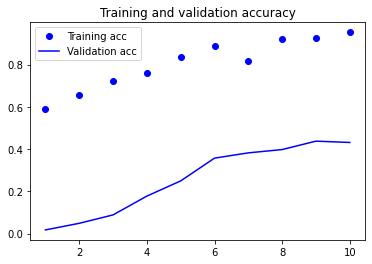

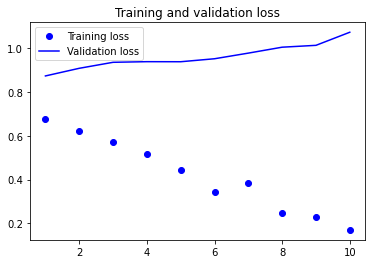

50/50 [==============================] - 3s 46ms/step - loss: 0.9884 - acc: 0.4981


[0.9884237051010132, 0.49812498688697815]

In [5]:
from keras.preprocessing import sequence
from tensorflow.python.keras.callbacks import EarlyStopping, ModelCheckpoint

max_features = 10000  # 특성으로 사용할 단어의 수

batch_size = 32
input_train = sequence.pad_sequences(train,maxlen=maxlen)
input_test = sequence.pad_sequences(test,maxlen=maxlen)

from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN

from keras.layers import Dense

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))
mc = ModelCheckpoint('best_simpleRNN.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, train_labels,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

model.evaluate(test, test_labels)

### LSTM

In [4]:
# LSTM
from keras.layers import LSTM
from tensorflow.python.keras.callbacks import EarlyStopping, ModelCheckpoint

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))
mc = ModelCheckpoint('best_lstm.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(input_train, train_labels,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

model.evaluate(test, test_labels)

NameError: name 'Sequential' is not defined

## 공작 + 완벽한 타인

In [23]:
lines_t = lines1 + lines3
lines_ut = lines2 + lines4
test_t = test1 + test3
test_ut = test2 + test4

lines_ = []
test_lines_ = []
for line in lines_t:
    lines_.append(line.strip())

for line in lines_ut:
    lines_.append(line.strip())

for line in test_t:
    test_lines_.append(line.strip()) # trust
for line in test_ut:
    test_lines_.append(line.strip()) # untrust

train_labels = [] # train 데이터 label
test_labels = [] # test 데이터 label
for i in range(len(lines_t)):
    train_labels.append(0)
for j in range(len(lines_ut)):
    train_labels.append(1)
for i in range(len(test_t)):
    test_labels.append(0)
for j in range(len(test_ut)):
    test_labels.append(1)
    
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np

okt = Okt()
x_train = []
x_test = []
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

for sentence in tqdm(lines_):
    tokenized_sentence = okt.morphs(sentence, stem=True) # 토큰화
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    x_train.append(stopwords_removed_sentence)

for sentence in tqdm(test_lines_):
    tokenized_sentence = okt.morphs(sentence, stem=True) # 토큰화
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    x_test.append(stopwords_removed_sentence)

maxlen = 1000  # 100개 단어 이후는 버립니다
training_samples = 200  # 훈련 샘플은 200 -> 200개입니다
validation_samples = 10000  # 검증 샘플은 10,000개입니다
max_words = 10000  # 데이터셋에서 가장 빈도 높은 10,000개의 단어만 사용합니다
# train 토큰화
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(x_train)
sequences = tokenizer.texts_to_sequences(x_train)

word_index = tokenizer.word_index
train = pad_sequences(sequences,maxlen=maxlen)

# test 토큰화
tokenizer2 = Tokenizer(num_words=max_words)
tokenizer2.fit_on_texts(x_test)
sequences2 = tokenizer2.texts_to_sequences(x_test)

word_index2 = tokenizer2.word_index
test = pad_sequences(sequences2,maxlen=maxlen)

train_labels = np.asarray(train_labels)
test_labels = np.asarray(test_labels)

100%|██████████████████████████████████████████████████████████████████████████████| 3201/3201 [05:10<00:00, 10.31it/s]


### simpleRNN

Epoch 1/10
80/80 [==============================] - 14s 165ms/step - loss: 0.6617 - acc: 0.6214 - val_loss: 0.8956 - val_acc: 0.0324
Epoch 2/10
80/80 [==============================] - 13s 167ms/step - loss: 0.5678 - acc: 0.7168 - val_loss: 0.7243 - val_acc: 0.5520
Epoch 3/10
80/80 [==============================] - 13s 165ms/step - loss: 0.4304 - acc: 0.8161 - val_loss: 0.8487 - val_acc: 0.4723
Epoch 4/10
80/80 [==============================] - 13s 166ms/step - loss: 0.3043 - acc: 0.8916 - val_loss: 0.8084 - val_acc: 0.5809
Epoch 5/10
80/80 [==============================] - 14s 170ms/step - loss: 0.3951 - acc: 0.8307 - val_loss: 0.7534 - val_acc: 0.6352
Epoch 6/10
80/80 [==============================] - 14s 177ms/step - loss: 0.1817 - acc: 0.9432 - val_loss: 0.8321 - val_acc: 0.6129
Epoch 7/10
80/80 [==============================] - 15s 188ms/step - loss: 0.1255 - acc: 0.9630 - val_loss: 1.1057 - val_acc: 0.5289
Epoch 8/10
80/80 [==============================] - 14s 175ms/step - 

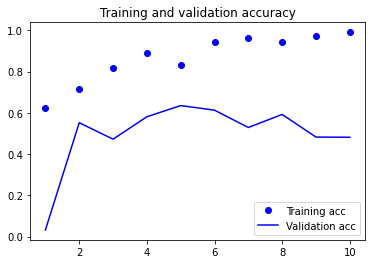

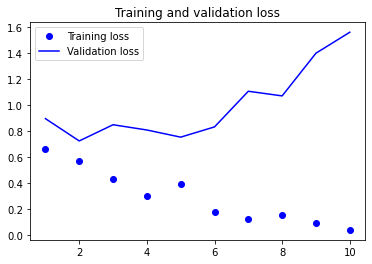

101/101 [==============================] - 3s 27ms/step - loss: 1.4001 - acc: 0.5017


[1.4001020193099976, 0.5017182230949402]

In [24]:
from keras.preprocessing import sequence
from tensorflow.python.keras.callbacks import EarlyStopping, ModelCheckpoint

max_features = 10000  # 특성으로 사용할 단어의 수

batch_size = 32
input_train = sequence.pad_sequences(train,maxlen=maxlen)
input_test = sequence.pad_sequences(test,maxlen=maxlen)

from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN

from keras.layers import Dense

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))
mc = ModelCheckpoint('best_simpleRNN1.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, train_labels,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

model.evaluate(test, test_labels)

### LSTM

Epoch 1/10
80/80 [==============================] - 34s 406ms/step - loss: 0.6220 - acc: 0.6593 - val_loss: 0.6493 - val_acc: 0.7168
Epoch 2/10
80/80 [==============================] - 32s 400ms/step - loss: 0.5219 - acc: 0.7560 - val_loss: 0.8487 - val_acc: 0.5566
Epoch 3/10
80/80 [==============================] - 32s 397ms/step - loss: 0.4568 - acc: 0.8020 - val_loss: 0.8307 - val_acc: 0.5785
Epoch 4/10
80/80 [==============================] - 32s 403ms/step - loss: 0.4041 - acc: 0.8339 - val_loss: 0.6732 - val_acc: 0.6687
Epoch 5/10
80/80 [==============================] - 32s 398ms/step - loss: 0.3654 - acc: 0.8552 - val_loss: 0.7611 - val_acc: 0.6219
Epoch 6/10
80/80 [==============================] - 31s 392ms/step - loss: 0.3345 - acc: 0.8702 - val_loss: 0.8546 - val_acc: 0.6074
Epoch 7/10
80/80 [==============================] - 31s 390ms/step - loss: 0.3095 - acc: 0.8806 - val_loss: 1.0926 - val_acc: 0.5070
Epoch 8/10
80/80 [==============================] - 31s 391ms/step - 

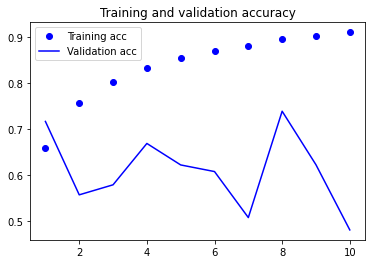

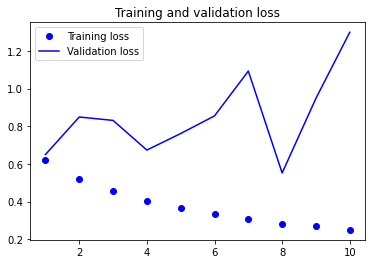

101/101 [==============================] - 6s 55ms/step - loss: 1.2576 - acc: 0.4983


[1.2575916051864624, 0.4982817769050598]

In [25]:
# LSTM
from keras.layers import LSTM
from tensorflow.python.keras.callbacks import EarlyStopping, ModelCheckpoint

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))
mc = ModelCheckpoint('best_lstm1.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(input_train, train_labels,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

model.evaluate(test, test_labels)

## 공작 + 완벽한 타인 + 암살

In [26]:
lines_t = lines1 + lines3 + lines5
lines_ut = lines2 + lines4 + lines6
test_t = test1 + test3 + test5
test_ut = test2 + test4 + test6

lines_ = []
test_lines_ = []
for line in lines_t:
    lines_.append(line.strip())

for line in lines_ut:
    lines_.append(line.strip())

for line in test_t:
    test_lines_.append(line.strip()) # trust
for line in test_ut:
    test_lines_.append(line.strip()) # untrust

train_labels = [] # train 데이터 label
test_labels = [] # test 데이터 label
for i in range(len(lines_t)):
    train_labels.append(0)
for j in range(len(lines_ut)):
    train_labels.append(1)
for i in range(len(test_t)):
    test_labels.append(0)
for j in range(len(test_ut)):
    test_labels.append(1)
    
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np

okt = Okt()
x_train = []
x_test = []
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

for sentence in tqdm(lines_):
    tokenized_sentence = okt.morphs(sentence, stem=True) # 토큰화
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    x_train.append(stopwords_removed_sentence)

for sentence in tqdm(test_lines_):
    tokenized_sentence = okt.morphs(sentence, stem=True) # 토큰화
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    x_test.append(stopwords_removed_sentence)

maxlen = 1000  # 100개 단어 이후는 버립니다
training_samples = 200  # 훈련 샘플은 200 -> 200개입니다
validation_samples = 10000  # 검증 샘플은 10,000개입니다
max_words = 10000  # 데이터셋에서 가장 빈도 높은 10,000개의 단어만 사용합니다
# train 토큰화
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(x_train)
sequences = tokenizer.texts_to_sequences(x_train)

word_index = tokenizer.word_index
train = pad_sequences(sequences,maxlen=maxlen)

# test 토큰화
tokenizer2 = Tokenizer(num_words=max_words)
tokenizer2.fit_on_texts(x_test)
sequences2 = tokenizer2.texts_to_sequences(x_test)

word_index2 = tokenizer2.word_index
test = pad_sequences(sequences2,maxlen=maxlen)

train_labels = np.asarray(train_labels)
test_labels = np.asarray(test_labels)

100%|██████████████████████████████████████████████████████████████████████████████| 4801/4801 [22:06<00:00,  3.62it/s]


### simpleRNN

Epoch 1/10
120/120 [==============================] - 29s 217ms/step - loss: 0.6522 - acc: 0.6321 - val_loss: 0.7699 - val_acc: 0.4620
Epoch 2/10
120/120 [==============================] - 25s 206ms/step - loss: 0.5442 - acc: 0.7358 - val_loss: 0.8468 - val_acc: 0.4307
Epoch 3/10
120/120 [==============================] - 25s 205ms/step - loss: 0.4251 - acc: 0.8164 - val_loss: 0.6976 - val_acc: 0.6482
Epoch 4/10
120/120 [==============================] - 25s 206ms/step - loss: 0.3334 - acc: 0.8640 - val_loss: 0.7903 - val_acc: 0.6049
Epoch 5/10
120/120 [==============================] - 24s 204ms/step - loss: 0.2113 - acc: 0.9270 - val_loss: 1.0499 - val_acc: 0.5206
Epoch 6/10
120/120 [==============================] - 25s 206ms/step - loss: 0.1602 - acc: 0.9444 - val_loss: 0.9965 - val_acc: 0.5987
Epoch 7/10
120/120 [==============================] - 25s 205ms/step - loss: 0.0996 - acc: 0.9699 - val_loss: 1.0766 - val_acc: 0.5878
Epoch 8/10
120/120 [==============================] - 2

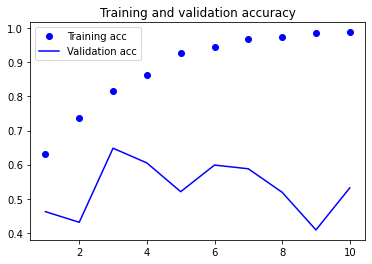

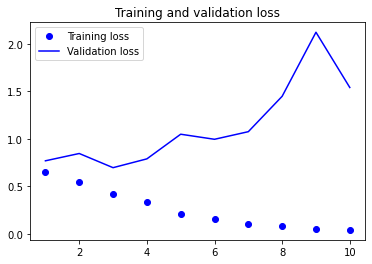

151/151 [==============================] - 5s 32ms/step - loss: 1.5276 - acc: 0.5224


[1.527588129043579, 0.522391140460968]

In [27]:
from keras.preprocessing import sequence
from tensorflow.python.keras.callbacks import EarlyStopping, ModelCheckpoint

max_features = 10000  # 특성으로 사용할 단어의 수

batch_size = 32
input_train = sequence.pad_sequences(train,maxlen=maxlen)
input_test = sequence.pad_sequences(test,maxlen=maxlen)

from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN

from keras.layers import Dense

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))
mc = ModelCheckpoint('best_simpleRNN2.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, train_labels,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

model.evaluate(test, test_labels)

### LSTM

Epoch 1/10
120/120 [==============================] - 60s 479ms/step - loss: 0.6139 - acc: 0.6606 - val_loss: 0.7604 - val_acc: 0.5586
Epoch 2/10
120/120 [==============================] - 59s 489ms/step - loss: 0.5290 - acc: 0.7457 - val_loss: 0.6105 - val_acc: 0.7401
Epoch 3/10
120/120 [==============================] - 58s 481ms/step - loss: 0.4749 - acc: 0.7839 - val_loss: 0.8361 - val_acc: 0.5456
Epoch 4/10
120/120 [==============================] - 57s 474ms/step - loss: 0.4375 - acc: 0.8089 - val_loss: 0.7717 - val_acc: 0.6367
Epoch 5/10
120/120 [==============================] - 56s 464ms/step - loss: 0.4069 - acc: 0.8257 - val_loss: 0.9123 - val_acc: 0.5661
Epoch 6/10
120/120 [==============================] - 56s 464ms/step - loss: 0.3918 - acc: 0.8387 - val_loss: 0.6113 - val_acc: 0.7401
Epoch 7/10
120/120 [==============================] - 58s 485ms/step - loss: 0.3665 - acc: 0.8489 - val_loss: 1.1919 - val_acc: 0.5141
Epoch 8/10
120/120 [==============================] - 5

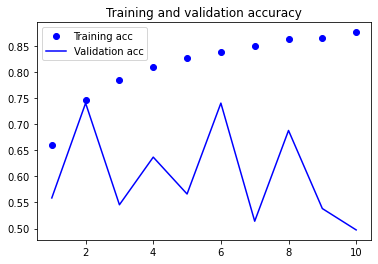

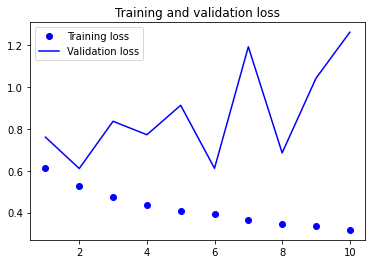

151/151 [==============================] - 11s 68ms/step - loss: 1.0833 - acc: 0.5516


[1.0833145380020142, 0.5515517592430115]

In [28]:
# LSTM
from keras.layers import LSTM
from tensorflow.python.keras.callbacks import EarlyStopping, ModelCheckpoint

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))
mc = ModelCheckpoint('best_lstm1.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(input_train, train_labels,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

model.evaluate(test, test_labels)

## 1987 + 공작 + 완벽한 타인 + 암살

In [29]:
lines_t = lines1 + lines3 + lines5 + lines7
lines_ut = lines2 + lines4 + lines6 + lines8
test_t = test1 + test3 + test5 + test7
test_ut = test2 + test4 + test6 + test8

lines_ = []
test_lines_ = []
for line in lines_t:
    lines_.append(line.strip())

for line in lines_ut:
    lines_.append(line.strip())

for line in test_t:
    test_lines_.append(line.strip()) # trust
for line in test_ut:
    test_lines_.append(line.strip()) # untrust

train_labels = [] # train 데이터 label
test_labels = [] # test 데이터 label
for i in range(len(lines_t)):
    train_labels.append(0)
for j in range(len(lines_ut)):
    train_labels.append(1)
for i in range(len(test_t)):
    test_labels.append(0)
for j in range(len(test_ut)):
    test_labels.append(1)
    
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np

okt = Okt()
x_train = []
x_test = []
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

for sentence in tqdm(lines_):
    tokenized_sentence = okt.morphs(sentence, stem=True) # 토큰화
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    x_train.append(stopwords_removed_sentence)

for sentence in tqdm(test_lines_):
    tokenized_sentence = okt.morphs(sentence, stem=True) # 토큰화
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    x_test.append(stopwords_removed_sentence)

maxlen = 1000 # 100개 단어 이후는 버립니다
training_samples = 200  # 훈련 샘플은 200 -> 200개입니다
validation_samples = 10000  # 검증 샘플은 10,000개입니다
max_words = 10000  # 데이터셋에서 가장 빈도 높은 10,000개의 단어만 사용합니다
# train 토큰화
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(x_train)
sequences = tokenizer.texts_to_sequences(x_train)

word_index = tokenizer.word_index
train = pad_sequences(sequences,maxlen=maxlen)

# test 토큰화
tokenizer2 = Tokenizer(num_words=max_words)
tokenizer2.fit_on_texts(x_test)
sequences2 = tokenizer2.texts_to_sequences(x_test)

word_index2 = tokenizer2.word_index
test = pad_sequences(sequences2,maxlen=maxlen)

train_labels = np.asarray(train_labels)
test_labels = np.asarray(test_labels)

100%|██████████████████████████████████████████████████████████████████████████████| 6401/6401 [30:21<00:00,  3.51it/s]


### simpleRNN

Epoch 1/10
161/161 [==============================] - 44s 218ms/step - loss: 0.6485 - acc: 0.6292 - val_loss: 0.8104 - val_acc: 0.5667
Epoch 2/10
161/161 [==============================] - 32s 199ms/step - loss: 0.5367 - acc: 0.7415 - val_loss: 2.0073 - val_acc: 0.0145
Epoch 3/10
161/161 [==============================] - 28s 175ms/step - loss: 0.4375 - acc: 0.8064 - val_loss: 0.6966 - val_acc: 0.6397
Epoch 4/10
161/161 [==============================] - 28s 177ms/step - loss: 0.3135 - acc: 0.8758 - val_loss: 0.5953 - val_acc: 0.7180
Epoch 5/10
161/161 [==============================] - 29s 177ms/step - loss: 0.2154 - acc: 0.9220 - val_loss: 1.3731 - val_acc: 0.3935
Epoch 6/10
161/161 [==============================] - 28s 177ms/step - loss: 0.1502 - acc: 0.9504 - val_loss: 1.2246 - val_acc: 0.5210
Epoch 7/10
161/161 [==============================] - 28s 176ms/step - loss: 0.1094 - acc: 0.9658 - val_loss: 1.1316 - val_acc: 0.5897
Epoch 8/10
161/161 [==============================] - 2

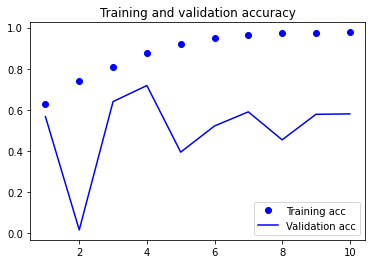

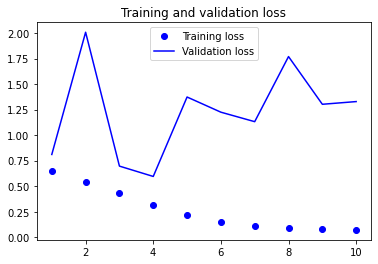

201/201 [==============================] - 5s 26ms/step - loss: 1.5473 - acc: 0.5312


[1.5472736358642578, 0.5311670303344727]

In [30]:
from keras.preprocessing import sequence
from tensorflow.python.keras.callbacks import EarlyStopping, ModelCheckpoint

max_features = 10000  # 특성으로 사용할 단어의 수

batch_size = 32
input_train = sequence.pad_sequences(train,maxlen=maxlen)
input_test = sequence.pad_sequences(test,maxlen=maxlen)

from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN

from keras.layers import Dense

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))
mc = ModelCheckpoint('best_simpleRNN3.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, train_labels,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

model.evaluate(test, test_labels)

### LSTM

Epoch 1/10
161/161 [==============================] - 75s 432ms/step - loss: 0.6009 - acc: 0.6768 - val_loss: 0.6358 - val_acc: 0.7305
Epoch 2/10
161/161 [==============================] - 67s 415ms/step - loss: 0.5233 - acc: 0.7513 - val_loss: 0.1486 - val_acc: 0.9951
Epoch 3/10
161/161 [==============================] - 67s 416ms/step - loss: 0.4859 - acc: 0.7789 - val_loss: 0.4552 - val_acc: 0.8660
Epoch 4/10
161/161 [==============================] - 67s 417ms/step - loss: 0.4577 - acc: 0.7979 - val_loss: 0.4072 - val_acc: 0.8520
Epoch 5/10
161/161 [==============================] - 67s 417ms/step - loss: 0.4343 - acc: 0.8102 - val_loss: 0.8514 - val_acc: 0.6134
Epoch 6/10
161/161 [==============================] - 67s 417ms/step - loss: 0.4181 - acc: 0.8182 - val_loss: 0.6389 - val_acc: 0.6698
Epoch 7/10
161/161 [==============================] - 67s 417ms/step - loss: 0.3997 - acc: 0.8300 - val_loss: 0.8563 - val_acc: 0.6360
Epoch 8/10
161/161 [==============================] - 6

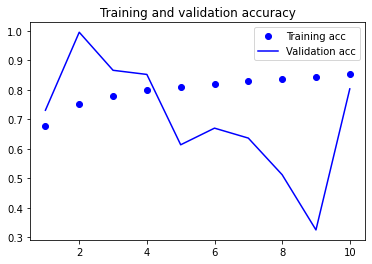

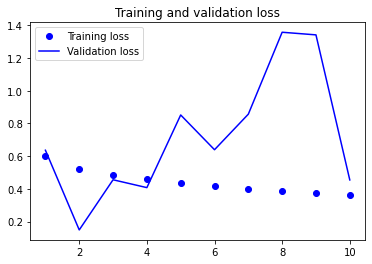

201/201 [==============================] - 11s 56ms/step - loss: 0.9128 - acc: 0.5080


[0.912806510925293, 0.5080456137657166]

In [31]:
# LSTM
from keras.layers import LSTM
from tensorflow.python.keras.callbacks import EarlyStopping, ModelCheckpoint

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))
mc = ModelCheckpoint('best_lstm3.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(input_train, train_labels,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

model.evaluate(test, test_labels)

## 1987 + 공작 + 완벽한 타인 + 택시운전사 + 암살

In [32]:
lines_t = lines1 + lines3 + lines5 + lines7 + lines9
lines_ut = lines2 + lines4 + lines6 + lines8 + lines10
test_t = test1 + test3 + test5 + test7 + test9
test_ut = test2 + test4 + test6 + test8 + test10

lines_ = []
test_lines_ = []
for line in lines_t:
    lines_.append(line.strip())

for line in lines_ut:
    lines_.append(line.strip())

for line in test_t:
    test_lines_.append(line.strip()) # trust
for line in test_ut:
    test_lines_.append(line.strip()) # untrust

train_labels = [] # train 데이터 label
test_labels = [] # test 데이터 label
for i in range(len(lines_t)):
    train_labels.append(0)
for j in range(len(lines_ut)):
    train_labels.append(1)
for i in range(len(test_t)):
    test_labels.append(0)
for j in range(len(test_ut)):
    test_labels.append(1)
    
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np

okt = Okt()
x_train = []
x_test = []
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

for sentence in tqdm(lines_):
    tokenized_sentence = okt.morphs(sentence, stem=True) # 토큰화
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    x_train.append(stopwords_removed_sentence)

for sentence in tqdm(test_lines_):
    tokenized_sentence = okt.morphs(sentence, stem=True) # 토큰화
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    x_test.append(stopwords_removed_sentence)

maxlen = 1000  # 100개 단어 이후는 버립니다
training_samples = 200  # 훈련 샘플은 200 -> 200개입니다
validation_samples = 10000  # 검증 샘플은 10,000개입니다
max_words = 10000  # 데이터셋에서 가장 빈도 높은 10,000개의 단어만 사용합니다
# train 토큰화
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(x_train)
sequences = tokenizer.texts_to_sequences(x_train)

word_index = tokenizer.word_index
train = pad_sequences(sequences,maxlen=maxlen)

# test 토큰화
tokenizer2 = Tokenizer(num_words=max_words)
tokenizer2.fit_on_texts(x_test)
sequences2 = tokenizer2.texts_to_sequences(x_test)

word_index2 = tokenizer2.word_index
test = pad_sequences(sequences2,maxlen=maxlen)

train_labels = np.asarray(train_labels)
test_labels = np.asarray(test_labels)

100%|██████████████████████████████████████████████████████████████████████████████| 8001/8001 [22:18<00:00,  5.98it/s]


### simpleRNN

Epoch 1/10
201/201 [==============================] - 37s 174ms/step - loss: 0.6347 - acc: 0.6496 - val_loss: 0.5658 - val_acc: 0.7819
Epoch 2/10
201/201 [==============================] - 35s 174ms/step - loss: 0.5370 - acc: 0.7393 - val_loss: 0.7911 - val_acc: 0.6057
Epoch 3/10
201/201 [==============================] - 35s 175ms/step - loss: 0.4968 - acc: 0.7630 - val_loss: 1.6205 - val_acc: 0.1936
Epoch 4/10
201/201 [==============================] - 35s 175ms/step - loss: 0.3898 - acc: 0.8313 - val_loss: 0.9981 - val_acc: 0.5488
Epoch 5/10
201/201 [==============================] - 35s 175ms/step - loss: 0.2923 - acc: 0.8814 - val_loss: 1.1523 - val_acc: 0.4813
Epoch 6/10
201/201 [==============================] - 35s 175ms/step - loss: 0.2174 - acc: 0.9177 - val_loss: 1.1872 - val_acc: 0.5618
Epoch 7/10
201/201 [==============================] - 35s 175ms/step - loss: 0.1617 - acc: 0.9427 - val_loss: 1.2984 - val_acc: 0.5215
Epoch 8/10
201/201 [==============================] - 3

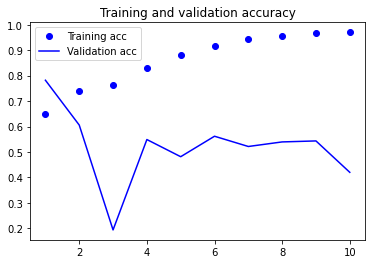

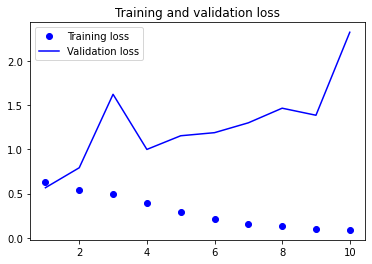

251/251 [==============================] - 6s 24ms/step - loss: 1.7785 - acc: 0.5379


[1.7785303592681885, 0.5379327535629272]

In [33]:
from keras.preprocessing import sequence
from tensorflow.python.keras.callbacks import EarlyStopping, ModelCheckpoint

max_features = 10000  # 특성으로 사용할 단어의 수

batch_size = 32
input_train = sequence.pad_sequences(train,maxlen=maxlen)
input_test = sequence.pad_sequences(test,maxlen=maxlen)

from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN

from keras.layers import Dense

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))
mc = ModelCheckpoint('best_simpleRNN4.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, train_labels,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

model.evaluate(test, test_labels)

### LSTM

Epoch 1/10
201/201 [==============================] - 87s 426ms/step - loss: 0.5813 - acc: 0.7037 - val_loss: 0.5382 - val_acc: 0.8527
Epoch 2/10
201/201 [==============================] - 85s 424ms/step - loss: 0.5076 - acc: 0.7625 - val_loss: 0.7458 - val_acc: 0.7175
Epoch 3/10
201/201 [==============================] - 84s 419ms/step - loss: 0.4729 - acc: 0.7886 - val_loss: 0.8088 - val_acc: 0.7082
Epoch 4/10
201/201 [==============================] - 84s 418ms/step - loss: 0.4535 - acc: 0.8007 - val_loss: 1.3342 - val_acc: 0.3378
Epoch 5/10
201/201 [==============================] - 84s 417ms/step - loss: 0.4350 - acc: 0.8125 - val_loss: 0.8004 - val_acc: 0.5998
Epoch 6/10
201/201 [==============================] - 83s 414ms/step - loss: 0.4192 - acc: 0.8217 - val_loss: 1.2217 - val_acc: 0.5571
Epoch 7/10
201/201 [==============================] - 83s 415ms/step - loss: 0.4073 - acc: 0.8281 - val_loss: 0.9473 - val_acc: 0.5744
Epoch 8/10
201/201 [==============================] - 8

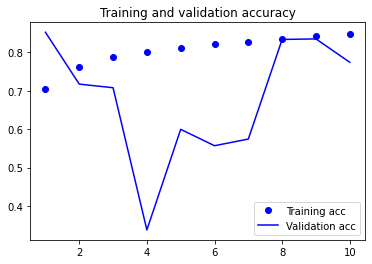

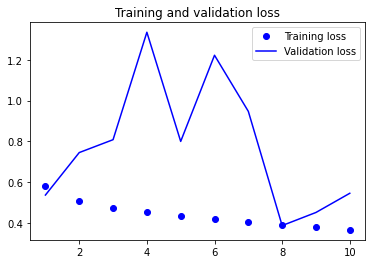

251/251 [==============================] - 14s 56ms/step - loss: 1.1111 - acc: 0.5314


[1.1110800504684448, 0.5314335823059082]

In [34]:
# LSTM
from keras.layers import LSTM
from tensorflow.python.keras.callbacks import EarlyStopping, ModelCheckpoint

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))
mc = ModelCheckpoint('best_lstm4.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(input_train, train_labels,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

model.evaluate(test, test_labels)

# Definition 2

In [35]:
from keras.preprocessing.text import Tokenizer
import codecs
from keras.preprocessing.sequence import pad_sequences
import numpy as np
import nltk
from konlpy.tag import Okt
from tqdm import tqdm

# train set
name = "2"
filename1 = './new_data/definition'+name+'_spynorth_scaling_trust.txt'
filename2 = './new_data/definition'+name+'_spynorth_scaling_untrust.txt'
filename3 = './new_data/definition'+name+'_intistranger_scaling_trust.txt'
filename4 = './new_data/definition'+name+'_intistranger_scaling_untrust.txt'
filename5 = './new_data/definition'+name+'_assassin_scaling_trust.txt'
filename6 = './new_data/definition'+name+'_assassin_scaling_untrust.txt'
filename7 = './new_data/definition'+name+'_1987_scaling_trust.txt'
filename8 = './new_data/definition'+name+'_1987_scaling_untrust.txt'
filename9 = './new_data/definition'+name+'_taxi_scaling_trust.txt'
filename10 = './new_data/definition'+name+'_taxi_scaling_untrust.txt'


with codecs.open(filename1, 'r', encoding='utf-8') as f:
    lines1 = f.readlines()
with codecs.open(filename2, 'r', encoding='utf-8') as f:
    lines2 = f.readlines()
with codecs.open(filename3, 'r', encoding='utf-8') as f:
    lines3 = f.readlines()
with codecs.open(filename4, 'r', encoding='utf-8') as f:
    lines4 = f.readlines()
with codecs.open(filename5, 'r', encoding='utf-8') as f:
    lines5 = f.readlines()
with codecs.open(filename6, 'r', encoding='utf-8') as f:
    lines6 = f.readlines()
with codecs.open(filename7, 'r', encoding='utf-8') as f:
    lines7 = f.readlines()
with codecs.open(filename8, 'r', encoding='utf-8') as f:
    lines8 = f.readlines()
with codecs.open(filename9, 'r', encoding='utf-8') as f:
    lines9 = f.readlines()
with codecs.open(filename10, 'r', encoding='utf-8') as f:
    lines10 = f.readlines()




# test set


with codecs.open('./new_data/definition'+name+'_spynorth_test_t.txt', 'r', 'utf-8') as f:
    test1 = f.readlines()
with codecs.open('./new_data/definition'+name+'_spynorth_test_ut.txt', 'r', 'utf-8') as f:
    test2 = f.readlines()
with codecs.open('./new_data/definition'+name+'_intistranger_test_t.txt', 'r', encoding='utf-8') as f:
    test3 = f.readlines()
with codecs.open('./new_data/definition'+name+'_intistranger_test_ut.txt', 'r', encoding='utf-8') as f:
    test4 = f.readlines()
with codecs.open('./new_data/definition'+name+'_assassin_test_t.txt', 'r', encoding='utf-8') as f:
    test5 = f.readlines()
with codecs.open('./new_data/definition'+name+'_assassin_test_ut.txt', 'r', encoding='utf-8') as f:
    test6 = f.readlines()
with codecs.open('./new_data/definition'+name+'_1987_test_t.txt', 'r', encoding='utf-8') as f:
    test7 = f.readlines()
with codecs.open('./new_data/definition'+name+'_1987_test_ut.txt', 'r', encoding='utf-8') as f:
    test8 = f.readlines()
with codecs.open('./new_data/definition'+name+'_taxi_test_t.txt', 'r', encoding='utf-8') as f:
    test9 = f.readlines()
with codecs.open('./new_data/definition'+name+'_taxi_test_ut.txt', 'r', encoding='utf-8') as f:
    test10 = f.readlines()

    



## 공작

In [36]:
lines_t = lines1
lines_ut = lines2
test_t = test1
test_ut = test2

lines_ = []
test_lines_ = []
for line in lines_t:
    lines_.append(line.strip())

for line in lines_ut:
    lines_.append(line.strip())

for line in test_t:
    test_lines_.append(line.strip()) # trust
for line in test_ut:
    test_lines_.append(line.strip()) # untrust

train_labels = [] # train 데이터 label
test_labels = [] # test 데이터 label
for i in range(len(lines_t)):
    train_labels.append(0)
for j in range(len(lines_ut)):
    train_labels.append(1)
for i in range(len(test_t)):
    test_labels.append(0)
for j in range(len(test_ut)):
    test_labels.append(1)
    
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np

okt = Okt()
x_train = []
x_test = []
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

for sentence in tqdm(lines_):
    tokenized_sentence = okt.morphs(sentence, stem=True) # 토큰화
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    x_train.append(stopwords_removed_sentence)

for sentence in tqdm(test_lines_):
    tokenized_sentence = okt.morphs(sentence, stem=True) # 토큰화
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    x_test.append(stopwords_removed_sentence)

maxlen = 1000  # 100개 단어 이후는 버립니다
training_samples = 200  # 훈련 샘플은 200 -> 200개입니다
validation_samples = 10000  # 검증 샘플은 10,000개입니다
max_words = 10000  # 데이터셋에서 가장 빈도 높은 10,000개의 단어만 사용합니다
# train 토큰화
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(x_train)
sequences = tokenizer.texts_to_sequences(x_train)

word_index = tokenizer.word_index
train = pad_sequences(sequences,maxlen=maxlen)

# test 토큰화
tokenizer2 = Tokenizer(num_words=max_words)
tokenizer2.fit_on_texts(x_test)
sequences2 = tokenizer2.texts_to_sequences(x_test)

word_index2 = tokenizer2.word_index
test = pad_sequences(sequences2,maxlen=maxlen)

train_labels = np.asarray(train_labels)
test_labels = np.asarray(test_labels)

100%|██████████████████████████████████████████████████████████████████████████████| 1600/1600 [02:49<00:00,  9.44it/s]


### simpleRNN

Epoch 1/10
40/40 [==============================] - 8s 174ms/step - loss: 0.6648 - acc: 0.6205 - val_loss: 1.1197 - val_acc: 0.0000e+00
Epoch 2/10
40/40 [==============================] - 7s 171ms/step - loss: 0.6256 - acc: 0.6557 - val_loss: 0.9921 - val_acc: 0.0445
Epoch 3/10
40/40 [==============================] - 7s 169ms/step - loss: 0.5386 - acc: 0.7658 - val_loss: 0.9120 - val_acc: 0.2319
Epoch 4/10
40/40 [==============================] - 7s 168ms/step - loss: 0.4315 - acc: 0.8713 - val_loss: 0.8712 - val_acc: 0.4052
Epoch 5/10
40/40 [==============================] - 7s 172ms/step - loss: 0.2915 - acc: 0.9416 - val_loss: 0.9588 - val_acc: 0.4200
Epoch 6/10
40/40 [==============================] - 7s 167ms/step - loss: 0.1650 - acc: 0.9777 - val_loss: 1.0787 - val_acc: 0.4278
Epoch 7/10
40/40 [==============================] - 7s 169ms/step - loss: 0.0862 - acc: 0.9953 - val_loss: 1.2662 - val_acc: 0.4098
Epoch 8/10
40/40 [==============================] - 7s 172ms/step - loss

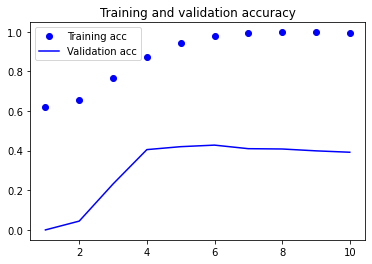

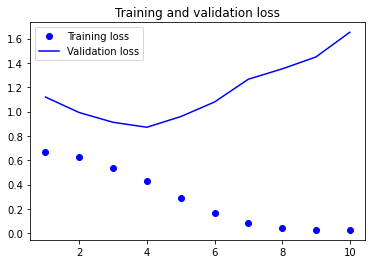

50/50 [==============================] - 1s 26ms/step - loss: 1.1826 - acc: 0.5275


[1.1826252937316895, 0.5274999737739563]

In [37]:
from keras.preprocessing import sequence
from tensorflow.python.keras.callbacks import EarlyStopping, ModelCheckpoint

max_features = 10000  # 특성으로 사용할 단어의 수

batch_size = 32
input_train = sequence.pad_sequences(train,maxlen=maxlen)
input_test = sequence.pad_sequences(test,maxlen=maxlen)

from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN

from keras.layers import Dense

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))
mc = ModelCheckpoint('best_simpleRNN.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, train_labels,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

model.evaluate(test, test_labels)

### LSTM

Epoch 1/10
40/40 [==============================] - 20s 467ms/step - loss: 0.6631 - acc: 0.6229 - val_loss: 0.9397 - val_acc: 0.0000e+00
Epoch 2/10
40/40 [==============================] - 18s 459ms/step - loss: 0.6314 - acc: 0.6262 - val_loss: 0.9180 - val_acc: 0.0523
Epoch 3/10
40/40 [==============================] - 18s 455ms/step - loss: 0.5785 - acc: 0.7004 - val_loss: 1.1061 - val_acc: 0.1444
Epoch 4/10
40/40 [==============================] - 18s 456ms/step - loss: 0.5127 - acc: 0.7740 - val_loss: 0.8191 - val_acc: 0.5543
Epoch 5/10
40/40 [==============================] - 18s 456ms/step - loss: 0.4417 - acc: 0.8186 - val_loss: 1.2017 - val_acc: 0.4926
Epoch 6/10
40/40 [==============================] - 18s 458ms/step - loss: 0.3923 - acc: 0.8396 - val_loss: 1.0974 - val_acc: 0.5355
Epoch 7/10
40/40 [==============================] - 18s 454ms/step - loss: 0.3406 - acc: 0.8598 - val_loss: 0.8866 - val_acc: 0.6183
Epoch 8/10
40/40 [==============================] - 18s 457ms/ste

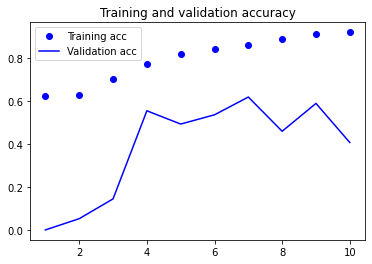

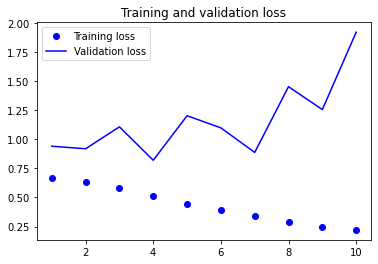

50/50 [==============================] - 3s 55ms/step - loss: 1.3193 - acc: 0.5081


[1.3193249702453613, 0.5081250071525574]

In [38]:
# LSTM
from keras.layers import LSTM
from tensorflow.python.keras.callbacks import EarlyStopping, ModelCheckpoint

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))
mc = ModelCheckpoint('best_lstm.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(input_train, train_labels,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

model.evaluate(test, test_labels)

## 공작 + 완벽한 타인

In [39]:
lines_t = lines1 + lines3
lines_ut = lines2 + lines4
test_t = test1 + test3
test_ut = test2 + test4

lines_ = []
test_lines_ = []
for line in lines_t:
    lines_.append(line.strip())

for line in lines_ut:
    lines_.append(line.strip())

for line in test_t:
    test_lines_.append(line.strip()) # trust
for line in test_ut:
    test_lines_.append(line.strip()) # untrust

train_labels = [] # train 데이터 label
test_labels = [] # test 데이터 label
for i in range(len(lines_t)):
    train_labels.append(0)
for j in range(len(lines_ut)):
    train_labels.append(1)
for i in range(len(test_t)):
    test_labels.append(0)
for j in range(len(test_ut)):
    test_labels.append(1)
    
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np

okt = Okt()
x_train = []
x_test = []
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

for sentence in tqdm(lines_):
    tokenized_sentence = okt.morphs(sentence, stem=True) # 토큰화
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    x_train.append(stopwords_removed_sentence)

for sentence in tqdm(test_lines_):
    tokenized_sentence = okt.morphs(sentence, stem=True) # 토큰화
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    x_test.append(stopwords_removed_sentence)

maxlen = 1000  # 100개 단어 이후는 버립니다
training_samples = 200  # 훈련 샘플은 200 -> 200개입니다
validation_samples = 10000  # 검증 샘플은 10,000개입니다
max_words = 10000  # 데이터셋에서 가장 빈도 높은 10,000개의 단어만 사용합니다
# train 토큰화
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(x_train)
sequences = tokenizer.texts_to_sequences(x_train)

word_index = tokenizer.word_index
train = pad_sequences(sequences,maxlen=maxlen)

# test 토큰화
tokenizer2 = Tokenizer(num_words=max_words)
tokenizer2.fit_on_texts(x_test)
sequences2 = tokenizer2.texts_to_sequences(x_test)

word_index2 = tokenizer2.word_index
test = pad_sequences(sequences2,maxlen=maxlen)

train_labels = np.asarray(train_labels)
test_labels = np.asarray(test_labels)

100%|██████████████████████████████████████████████████████████████████████████████| 3201/3201 [05:18<00:00, 10.06it/s]


### simpleRNN

Epoch 1/10
81/81 [==============================] - 15s 181ms/step - loss: 0.6627 - acc: 0.6187 - val_loss: 0.9067 - val_acc: 3.9047e-04
Epoch 2/10
81/81 [==============================] - 14s 174ms/step - loss: 0.6007 - acc: 0.6872 - val_loss: 0.7802 - val_acc: 0.4822
Epoch 3/10
81/81 [==============================] - 14s 174ms/step - loss: 0.4661 - acc: 0.8149 - val_loss: 0.9060 - val_acc: 0.4494
Epoch 4/10
81/81 [==============================] - 14s 174ms/step - loss: 0.3544 - acc: 0.8783 - val_loss: 1.0183 - val_acc: 0.4440
Epoch 5/10
81/81 [==============================] - 14s 175ms/step - loss: 0.1993 - acc: 0.9483 - val_loss: 1.7483 - val_acc: 0.1812
Epoch 6/10
81/81 [==============================] - 14s 175ms/step - loss: 0.5223 - acc: 0.7414 - val_loss: 2.5385 - val_acc: 0.0777
Epoch 7/10
81/81 [==============================] - 14s 174ms/step - loss: 0.2659 - acc: 0.8918 - val_loss: 2.8271 - val_acc: 0.1199
Epoch 8/10
81/81 [==============================] - 14s 173ms/ste

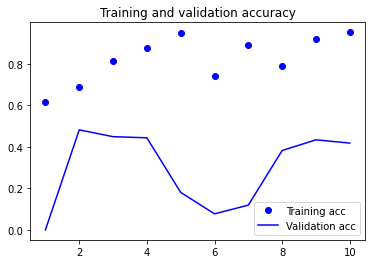

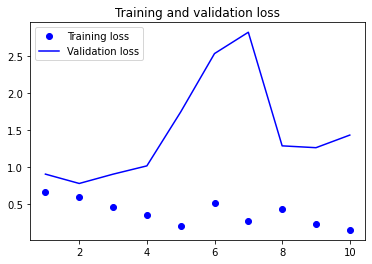

101/101 [==============================] - 2s 23ms/step - loss: 1.0988 - acc: 0.5173


[1.0987693071365356, 0.5173383355140686]

In [40]:
from keras.preprocessing import sequence
from tensorflow.python.keras.callbacks import EarlyStopping, ModelCheckpoint

max_features = 10000  # 특성으로 사용할 단어의 수

batch_size = 32
input_train = sequence.pad_sequences(train,maxlen=maxlen)
input_test = sequence.pad_sequences(test,maxlen=maxlen)

from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN

from keras.layers import Dense

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))
mc = ModelCheckpoint('best_simpleRNN1.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, train_labels,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

model.evaluate(test, test_labels)

### LSTM

Epoch 1/10
81/81 [==============================] - 37s 435ms/step - loss: 0.6479 - acc: 0.6309 - val_loss: 0.6998 - val_acc: 0.5389
Epoch 2/10
81/81 [==============================] - 35s 428ms/step - loss: 0.5796 - acc: 0.7087 - val_loss: 1.7583 - val_acc: 0.1937
Epoch 3/10
81/81 [==============================] - 35s 429ms/step - loss: 0.5264 - acc: 0.7519 - val_loss: 0.8287 - val_acc: 0.4666
Epoch 4/10
81/81 [==============================] - 35s 429ms/step - loss: 0.4789 - acc: 0.7837 - val_loss: 1.5596 - val_acc: 0.3643
Epoch 5/10
81/81 [==============================] - 35s 429ms/step - loss: 0.4477 - acc: 0.8092 - val_loss: 0.6720 - val_acc: 0.6560
Epoch 6/10
81/81 [==============================] - 35s 428ms/step - loss: 0.4151 - acc: 0.8259 - val_loss: 1.7844 - val_acc: 0.4420
Epoch 7/10
81/81 [==============================] - 35s 431ms/step - loss: 0.3839 - acc: 0.8409 - val_loss: 1.5048 - val_acc: 0.4127
Epoch 8/10
81/81 [==============================] - 35s 431ms/step - 

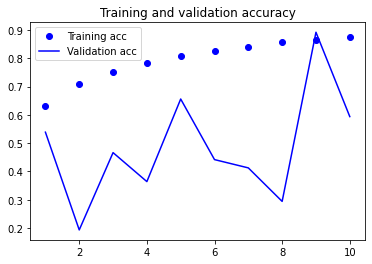

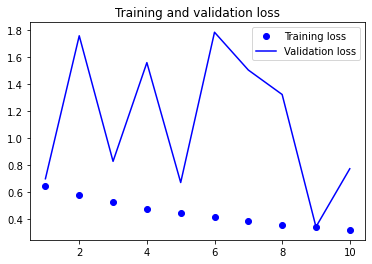

101/101 [==============================] - 5s 54ms/step - loss: 0.8976 - acc: 0.5086


[0.8976343274116516, 0.5085910558700562]

In [41]:
# LSTM
from keras.layers import LSTM
from tensorflow.python.keras.callbacks import EarlyStopping, ModelCheckpoint

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))
mc = ModelCheckpoint('best_lstm1.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(input_train, train_labels,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

model.evaluate(test, test_labels)

## 공작 + 완벽한 타인 + 암살

In [42]:
lines_t = lines1 + lines3 + lines5
lines_ut = lines2 + lines4 + lines6
test_t = test1 + test3 + test5
test_ut = test2 + test4 + test6

lines_ = []
test_lines_ = []
for line in lines_t:
    lines_.append(line.strip())

for line in lines_ut:
    lines_.append(line.strip())

for line in test_t:
    test_lines_.append(line.strip()) # trust
for line in test_ut:
    test_lines_.append(line.strip()) # untrust

train_labels = [] # train 데이터 label
test_labels = [] # test 데이터 label
for i in range(len(lines_t)):
    train_labels.append(0)
for j in range(len(lines_ut)):
    train_labels.append(1)
for i in range(len(test_t)):
    test_labels.append(0)
for j in range(len(test_ut)):
    test_labels.append(1)
    
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np

okt = Okt()
x_train = []
x_test = []
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

for sentence in tqdm(lines_):
    tokenized_sentence = okt.morphs(sentence, stem=True) # 토큰화
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    x_train.append(stopwords_removed_sentence)

for sentence in tqdm(test_lines_):
    tokenized_sentence = okt.morphs(sentence, stem=True) # 토큰화
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    x_test.append(stopwords_removed_sentence)

maxlen = 1000  # 100개 단어 이후는 버립니다
training_samples = 200  # 훈련 샘플은 200 -> 200개입니다
validation_samples = 10000  # 검증 샘플은 10,000개입니다
max_words = 10000  # 데이터셋에서 가장 빈도 높은 10,000개의 단어만 사용합니다
# train 토큰화
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(x_train)
sequences = tokenizer.texts_to_sequences(x_train)

word_index = tokenizer.word_index
train = pad_sequences(sequences,maxlen=maxlen)

# test 토큰화
tokenizer2 = Tokenizer(num_words=max_words)
tokenizer2.fit_on_texts(x_test)
sequences2 = tokenizer2.texts_to_sequences(x_test)

word_index2 = tokenizer2.word_index
test = pad_sequences(sequences2,maxlen=maxlen)

train_labels = np.asarray(train_labels)
test_labels = np.asarray(test_labels)

100%|██████████████████████████████████████████████████████████████████████████████| 4802/4802 [12:15<00:00,  6.53it/s]


### simpleRNN

Epoch 1/10
121/121 [==============================] - 24s 189ms/step - loss: 0.6600 - acc: 0.6244 - val_loss: 0.7735 - val_acc: 0.2023
Epoch 2/10
121/121 [==============================] - 22s 184ms/step - loss: 0.6044 - acc: 0.6831 - val_loss: 1.0236 - val_acc: 0.1893
Epoch 3/10
121/121 [==============================] - 22s 185ms/step - loss: 0.4583 - acc: 0.8021 - val_loss: 0.5008 - val_acc: 0.8451
Epoch 4/10
121/121 [==============================] - 22s 184ms/step - loss: 0.3025 - acc: 0.8877 - val_loss: 0.9506 - val_acc: 0.4991
Epoch 5/10
121/121 [==============================] - 22s 184ms/step - loss: 0.5048 - acc: 0.7505 - val_loss: 0.7173 - val_acc: 0.6522
Epoch 6/10
121/121 [==============================] - 22s 184ms/step - loss: 0.2558 - acc: 0.9016 - val_loss: 1.5856 - val_acc: 0.3322
Epoch 7/10
121/121 [==============================] - 22s 184ms/step - loss: 0.1664 - acc: 0.9456 - val_loss: 1.4056 - val_acc: 0.4371
Epoch 8/10
121/121 [==============================] - 2

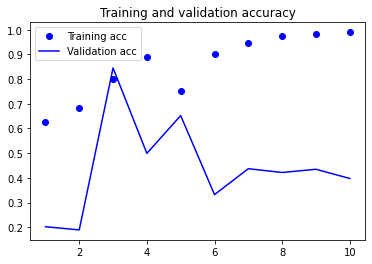

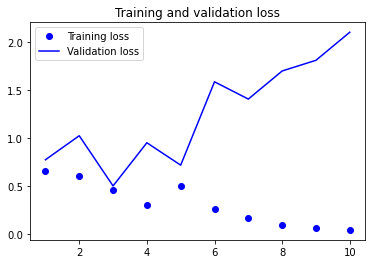

151/151 [==============================] - 4s 26ms/step - loss: 1.5282 - acc: 0.5346


[1.5281530618667603, 0.5345689058303833]

In [43]:
from keras.preprocessing import sequence
from tensorflow.python.keras.callbacks import EarlyStopping, ModelCheckpoint

max_features = 10000  # 특성으로 사용할 단어의 수

batch_size = 32
input_train = sequence.pad_sequences(train,maxlen=maxlen)
input_test = sequence.pad_sequences(test,maxlen=maxlen)

from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN

from keras.layers import Dense

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))
mc = ModelCheckpoint('best_simpleRNN2.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, train_labels,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

model.evaluate(test, test_labels)

### LSTM

Epoch 1/10
121/121 [==============================] - 53s 426ms/step - loss: 0.6383 - acc: 0.6373 - val_loss: 0.7685 - val_acc: 0.5319
Epoch 2/10
121/121 [==============================] - 52s 429ms/step - loss: 0.5750 - acc: 0.7189 - val_loss: 1.2378 - val_acc: 0.4202
Epoch 3/10
121/121 [==============================] - 53s 434ms/step - loss: 0.5327 - acc: 0.7462 - val_loss: 0.5602 - val_acc: 0.8021
Epoch 4/10
121/121 [==============================] - 52s 431ms/step - loss: 0.4965 - acc: 0.7694 - val_loss: 1.1211 - val_acc: 0.4030
Epoch 5/10
121/121 [==============================] - 52s 429ms/step - loss: 0.4730 - acc: 0.7872 - val_loss: 0.9630 - val_acc: 0.4423
Epoch 6/10
121/121 [==============================] - 52s 430ms/step - loss: 0.4464 - acc: 0.8047 - val_loss: 0.8394 - val_acc: 0.5160
Epoch 7/10
121/121 [==============================] - 53s 437ms/step - loss: 0.4237 - acc: 0.8185 - val_loss: 0.3742 - val_acc: 0.8480
Epoch 8/10
121/121 [==============================] - 5

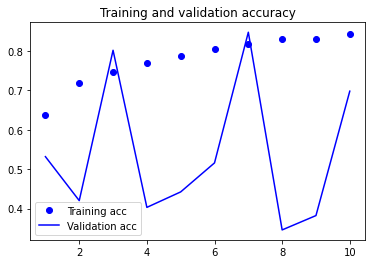

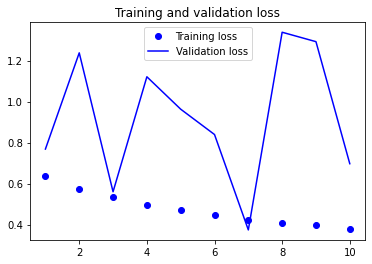

151/151 [==============================] - 9s 56ms/step - loss: 1.5157 - acc: 0.4873


[1.5156712532043457, 0.4872969686985016]

In [44]:
# LSTM
from keras.layers import LSTM
from tensorflow.python.keras.callbacks import EarlyStopping, ModelCheckpoint

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))
mc = ModelCheckpoint('best_lstm1.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(input_train, train_labels,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

model.evaluate(test, test_labels)

## 1987 + 공작 + 완벽한 타인 + 암살

In [45]:
lines_t = lines1 + lines3 + lines5 + lines7
lines_ut = lines2 + lines4 + lines6 + lines8
test_t = test1 + test3 + test5 + test7
test_ut = test2 + test4 + test6 + test8

lines_ = []
test_lines_ = []
for line in lines_t:
    lines_.append(line.strip())

for line in lines_ut:
    lines_.append(line.strip())

for line in test_t:
    test_lines_.append(line.strip()) # trust
for line in test_ut:
    test_lines_.append(line.strip()) # untrust

train_labels = [] # train 데이터 label
test_labels = [] # test 데이터 label
for i in range(len(lines_t)):
    train_labels.append(0)
for j in range(len(lines_ut)):
    train_labels.append(1)
for i in range(len(test_t)):
    test_labels.append(0)
for j in range(len(test_ut)):
    test_labels.append(1)
    
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np

okt = Okt()
x_train = []
x_test = []
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

for sentence in tqdm(lines_):
    tokenized_sentence = okt.morphs(sentence, stem=True) # 토큰화
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    x_train.append(stopwords_removed_sentence)

for sentence in tqdm(test_lines_):
    tokenized_sentence = okt.morphs(sentence, stem=True) # 토큰화
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    x_test.append(stopwords_removed_sentence)

maxlen = 1000  # 100개 단어 이후는 버립니다
training_samples = 200  # 훈련 샘플은 200 -> 200개입니다
validation_samples = 10000  # 검증 샘플은 10,000개입니다
max_words = 10000  # 데이터셋에서 가장 빈도 높은 10,000개의 단어만 사용합니다
# train 토큰화
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(x_train)
sequences = tokenizer.texts_to_sequences(x_train)

word_index = tokenizer.word_index
train = pad_sequences(sequences,maxlen=maxlen)

# test 토큰화
tokenizer2 = Tokenizer(num_words=max_words)
tokenizer2.fit_on_texts(x_test)
sequences2 = tokenizer2.texts_to_sequences(x_test)

word_index2 = tokenizer2.word_index
test = pad_sequences(sequences2,maxlen=maxlen)

train_labels = np.asarray(train_labels)
test_labels = np.asarray(test_labels)

100%|██████████████████████████████████████████████████████████████████████████████| 6402/6402 [17:27<00:00,  6.11it/s]


### simpleRNN

Epoch 1/10
161/161 [==============================] - 29s 177ms/step - loss: 0.6471 - acc: 0.6237 - val_loss: 1.0916 - val_acc: 0.1271
Epoch 2/10
161/161 [==============================] - 29s 181ms/step - loss: 0.5755 - acc: 0.7078 - val_loss: 0.8766 - val_acc: 0.3372
Epoch 3/10
161/161 [==============================] - 29s 180ms/step - loss: 0.4952 - acc: 0.7733 - val_loss: 0.9981 - val_acc: 0.3524
Epoch 4/10
161/161 [==============================] - 29s 181ms/step - loss: 0.4174 - acc: 0.8210 - val_loss: 1.8991 - val_acc: 0.0330
Epoch 5/10
161/161 [==============================] - 30s 187ms/step - loss: 0.3316 - acc: 0.8635 - val_loss: 0.8849 - val_acc: 0.5720
Epoch 6/10
161/161 [==============================] - 29s 182ms/step - loss: 0.3927 - acc: 0.8299 - val_loss: 1.1071 - val_acc: 0.4824
Epoch 7/10
161/161 [==============================] - 29s 181ms/step - loss: 0.1818 - acc: 0.9393 - val_loss: 1.3477 - val_acc: 0.4633
Epoch 8/10
161/161 [==============================] - 2

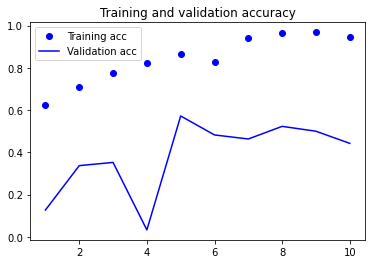

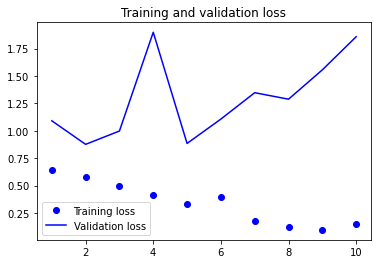

201/201 [==============================] - 5s 25ms/step - loss: 1.3914 - acc: 0.5472


[1.3914060592651367, 0.5471727848052979]

In [46]:
from keras.preprocessing import sequence
from tensorflow.python.keras.callbacks import EarlyStopping, ModelCheckpoint

max_features = 10000  # 특성으로 사용할 단어의 수

batch_size = 32
input_train = sequence.pad_sequences(train,maxlen=maxlen)
input_test = sequence.pad_sequences(test,maxlen=maxlen)

from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN

from keras.layers import Dense

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))
mc = ModelCheckpoint('best_simpleRNN3.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, train_labels,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

model.evaluate(test, test_labels)

### LSTM

Epoch 1/10
161/161 [==============================] - 69s 423ms/step - loss: 0.6301 - acc: 0.6532 - val_loss: 0.6216 - val_acc: 0.8016
Epoch 2/10
161/161 [==============================] - 68s 419ms/step - loss: 0.5716 - acc: 0.7161 - val_loss: 0.4646 - val_acc: 0.9008
Epoch 3/10
161/161 [==============================] - 68s 421ms/step - loss: 0.5420 - acc: 0.7410 - val_loss: 0.4024 - val_acc: 0.9041
Epoch 4/10
161/161 [==============================] - 68s 420ms/step - loss: 0.5148 - acc: 0.7570 - val_loss: 1.2072 - val_acc: 0.4770
Epoch 5/10
161/161 [==============================] - 68s 421ms/step - loss: 0.4924 - acc: 0.7738 - val_loss: 1.3638 - val_acc: 0.3616
Epoch 6/10
161/161 [==============================] - 68s 421ms/step - loss: 0.4736 - acc: 0.7879 - val_loss: 0.7995 - val_acc: 0.6419
Epoch 7/10
161/161 [==============================] - 68s 421ms/step - loss: 0.4564 - acc: 0.7966 - val_loss: 1.4107 - val_acc: 0.4174
Epoch 8/10
161/161 [==============================] - 6

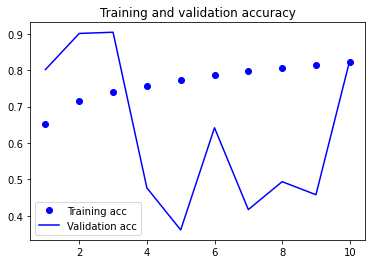

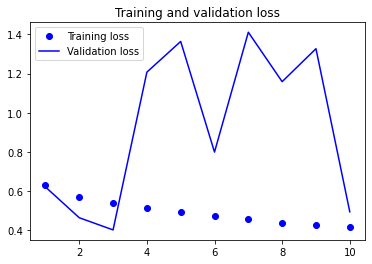

201/201 [==============================] - 11s 57ms/step - loss: 1.0157 - acc: 0.5647


[1.0157084465026855, 0.564667284488678]

In [47]:
# LSTM
from keras.layers import LSTM
from tensorflow.python.keras.callbacks import EarlyStopping, ModelCheckpoint

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))
mc = ModelCheckpoint('best_lstm3.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(input_train, train_labels,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

model.evaluate(test, test_labels)

## 1987 + 공작 + 완벽한 타인 + 택시운전사 + 암살

In [48]:
lines_t = lines1 + lines3 + lines5 + lines7 + lines9
lines_ut = lines2 + lines4 + lines6 + lines8 + lines10
test_t = test1 + test3 + test5 + test7 + test9
test_ut = test2 + test4 + test6 + test8 + test10

lines_ = []
test_lines_ = []
for line in lines_t:
    lines_.append(line.strip())

for line in lines_ut:
    lines_.append(line.strip())

for line in test_t:
    test_lines_.append(line.strip()) # trust
for line in test_ut:
    test_lines_.append(line.strip()) # untrust

train_labels = [] # train 데이터 label
test_labels = [] # test 데이터 label
for i in range(len(lines_t)):
    train_labels.append(0)
for j in range(len(lines_ut)):
    train_labels.append(1)
for i in range(len(test_t)):
    test_labels.append(0)
for j in range(len(test_ut)):
    test_labels.append(1)
    
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np

okt = Okt()
x_train = []
x_test = []
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

for sentence in tqdm(lines_):
    tokenized_sentence = okt.morphs(sentence, stem=True) # 토큰화
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    x_train.append(stopwords_removed_sentence)

for sentence in tqdm(test_lines_):
    tokenized_sentence = okt.morphs(sentence, stem=True) # 토큰화
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    x_test.append(stopwords_removed_sentence)

maxlen = 1000  # 100개 단어 이후는 버립니다
training_samples = 200  # 훈련 샘플은 200 -> 200개입니다
validation_samples = 10000  # 검증 샘플은 10,000개입니다
max_words = 10000  # 데이터셋에서 가장 빈도 높은 10,000개의 단어만 사용합니다
# train 토큰화
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(x_train)
sequences = tokenizer.texts_to_sequences(x_train)

word_index = tokenizer.word_index
train = pad_sequences(sequences,maxlen=maxlen)

# test 토큰화
tokenizer2 = Tokenizer(num_words=max_words)
tokenizer2.fit_on_texts(x_test)
sequences2 = tokenizer2.texts_to_sequences(x_test)

word_index2 = tokenizer2.word_index
test = pad_sequences(sequences2,maxlen=maxlen)

train_labels = np.asarray(train_labels)
test_labels = np.asarray(test_labels)

100%|██████████████████████████████████████████████████████████████████████████████| 8002/8002 [22:38<00:00,  5.89it/s]


### simpleRNN

Epoch 1/10
201/201 [==============================] - 36s 175ms/step - loss: 0.6554 - acc: 0.6229 - val_loss: 0.5436 - val_acc: 0.9185
Epoch 2/10
201/201 [==============================] - 36s 178ms/step - loss: 0.6119 - acc: 0.6759 - val_loss: 1.1421 - val_acc: 0.0687
Epoch 3/10
201/201 [==============================] - 36s 179ms/step - loss: 0.5689 - acc: 0.7063 - val_loss: 0.3124 - val_acc: 0.9892
Epoch 4/10
201/201 [==============================] - 36s 178ms/step - loss: 0.4441 - acc: 0.7977 - val_loss: 0.9158 - val_acc: 0.4891
Epoch 5/10
201/201 [==============================] - 36s 178ms/step - loss: 0.3372 - acc: 0.8610 - val_loss: 0.7820 - val_acc: 0.6134
Epoch 6/10
201/201 [==============================] - 36s 180ms/step - loss: 0.2412 - acc: 0.9094 - val_loss: 1.0655 - val_acc: 0.5442
Epoch 7/10
201/201 [==============================] - 36s 178ms/step - loss: 0.1763 - acc: 0.9373 - val_loss: 1.3048 - val_acc: 0.5077
Epoch 8/10
201/201 [==============================] - 3

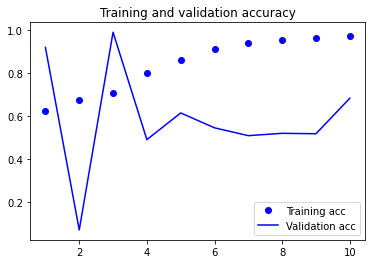

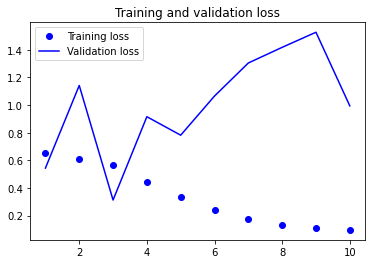

251/251 [==============================] - 6s 26ms/step - loss: 1.4154 - acc: 0.5726


[1.415420651435852, 0.5726068615913391]

In [49]:
from keras.preprocessing import sequence
from tensorflow.python.keras.callbacks import EarlyStopping, ModelCheckpoint

max_features = 10000  # 특성으로 사용할 단어의 수

batch_size = 32
input_train = sequence.pad_sequences(train,maxlen=maxlen)
input_test = sequence.pad_sequences(test,maxlen=maxlen)

from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN

from keras.layers import Dense

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))
mc = ModelCheckpoint('best_simpleRNN4.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, train_labels,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

model.evaluate(test, test_labels)

### LSTM

Epoch 1/10
201/201 [==============================] - 88s 432ms/step - loss: 0.6165 - acc: 0.6695 - val_loss: 0.7041 - val_acc: 0.7085
Epoch 2/10
201/201 [==============================] - 86s 429ms/step - loss: 0.5628 - acc: 0.7238 - val_loss: 1.1337 - val_acc: 0.4517
Epoch 3/10
201/201 [==============================] - 85s 424ms/step - loss: 0.5317 - acc: 0.7468 - val_loss: 1.3242 - val_acc: 0.3550
Epoch 4/10
201/201 [==============================] - 85s 425ms/step - loss: 0.5149 - acc: 0.7618 - val_loss: 0.9136 - val_acc: 0.4219
Epoch 5/10
201/201 [==============================] - 86s 429ms/step - loss: 0.4900 - acc: 0.7777 - val_loss: 1.1617 - val_acc: 0.2193
Epoch 6/10
201/201 [==============================] - 85s 424ms/step - loss: 0.4732 - acc: 0.7903 - val_loss: 1.2312 - val_acc: 0.3547
Epoch 7/10
201/201 [==============================] - 85s 424ms/step - loss: 0.4531 - acc: 0.8035 - val_loss: 0.8602 - val_acc: 0.5359
Epoch 8/10
201/201 [==============================] - 8

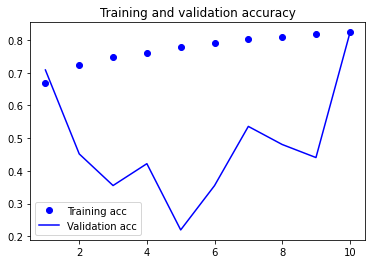

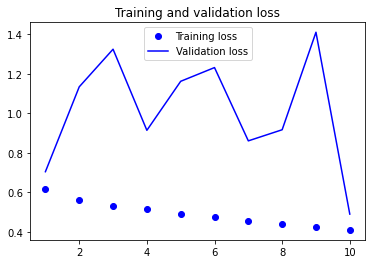

251/251 [==============================] - 14s 57ms/step - loss: 1.0735 - acc: 0.5520


[1.0735431909561157, 0.5519869923591614]

In [50]:
# LSTM
from keras.layers import LSTM
from tensorflow.python.keras.callbacks import EarlyStopping, ModelCheckpoint

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))
mc = ModelCheckpoint('best_lstm4.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(input_train, train_labels,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

model.evaluate(test, test_labels)

# Definition 3

In [5]:
from keras.preprocessing.text import Tokenizer
import codecs
from keras.preprocessing.sequence import pad_sequences
import numpy as np
import nltk
from konlpy.tag import Okt
from tqdm import tqdm

# train set
name = "3"
filename1 = './new_data/definition'+name+'_spynorth_scaling_trust.txt'
filename2 = './new_data/definition'+name+'_spynorth_scaling_untrust.txt'
filename3 = './new_data/definition'+name+'_intistranger_scaling_trust.txt'
filename4 = './new_data/definition'+name+'_intistranger_scaling_untrust.txt'
filename5 = './new_data/definition'+name+'_assassin_scaling_trust.txt'
filename6 = './new_data/definition'+name+'_assassin_scaling_untrust.txt'
filename7 = './new_data/definition'+name+'_1987_scaling_trust.txt'
filename8 = './new_data/definition'+name+'_1987_scaling_untrust.txt'
filename9 = './new_data/definition'+name+'_taxi_scaling_trust.txt'
filename10 = './new_data/definition'+name+'_taxi_scaling_untrust.txt'


with codecs.open(filename1, 'r', encoding='utf-8') as f:
    lines1 = f.readlines()
with codecs.open(filename2, 'r', encoding='utf-8') as f:
    lines2 = f.readlines()
with codecs.open(filename3, 'r', encoding='utf-8') as f:
    lines3 = f.readlines()
with codecs.open(filename4, 'r', encoding='utf-8') as f:
    lines4 = f.readlines()
with codecs.open(filename5, 'r', encoding='utf-8') as f:
    lines5 = f.readlines()
with codecs.open(filename6, 'r', encoding='utf-8') as f:
    lines6 = f.readlines()
with codecs.open(filename7, 'r', encoding='utf-8') as f:
    lines7 = f.readlines()
with codecs.open(filename8, 'r', encoding='utf-8') as f:
    lines8 = f.readlines()
with codecs.open(filename9, 'r', encoding='utf-8') as f:
    lines9 = f.readlines()
with codecs.open(filename10, 'r', encoding='utf-8') as f:
    lines10 = f.readlines()




# test set


with codecs.open('./new_data/definition'+name+'_spynorth_test_t.txt', 'r', 'utf-8') as f:
    test1 = f.readlines()
with codecs.open('./new_data/definition'+name+'_spynorth_test_ut.txt', 'r', 'utf-8') as f:
    test2 = f.readlines()
with codecs.open('./new_data/definition'+name+'_intistranger_test_t.txt', 'r', encoding='utf-8') as f:
    test3 = f.readlines()
with codecs.open('./new_data/definition'+name+'_intistranger_test_ut.txt', 'r', encoding='utf-8') as f:
    test4 = f.readlines()
with codecs.open('./new_data/definition'+name+'_assassin_test_t.txt', 'r', encoding='utf-8') as f:
    test5 = f.readlines()
with codecs.open('./new_data/definition'+name+'_assassin_test_ut.txt', 'r', encoding='utf-8') as f:
    test6 = f.readlines()
with codecs.open('./new_data/definition'+name+'_1987_test_t.txt', 'r', encoding='utf-8') as f:
    test7 = f.readlines()
with codecs.open('./new_data/definition'+name+'_1987_test_ut.txt', 'r', encoding='utf-8') as f:
    test8 = f.readlines()
with codecs.open('./new_data/definition'+name+'_taxi_test_t.txt', 'r', encoding='utf-8') as f:
    test9 = f.readlines()
with codecs.open('./new_data/definition'+name+'_taxi_test_ut.txt', 'r', encoding='utf-8') as f:
    test10 = f.readlines()

    



## 공작

In [6]:
lines_t = lines1
lines_ut = lines2
test_t = test1
test_ut = test2

lines_ = []
test_lines_ = []
for line in lines_t:
    lines_.append(line.strip())

for line in lines_ut:
    lines_.append(line.strip())

for line in test_t:
    test_lines_.append(line.strip()) # trust
for line in test_ut:
    test_lines_.append(line.strip()) # untrust

train_labels = [] # train 데이터 label
test_labels = [] # test 데이터 label
for i in range(len(lines_t)):
    train_labels.append(0)
for j in range(len(lines_ut)):
    train_labels.append(1)
for i in range(len(test_t)):
    test_labels.append(0)
for j in range(len(test_ut)):
    test_labels.append(1)
    
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np

okt = Okt()
x_train = []
x_test = []
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

for sentence in tqdm(lines_):
    tokenized_sentence = okt.morphs(sentence, stem=True) # 토큰화
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    x_train.append(stopwords_removed_sentence)

for sentence in tqdm(test_lines_):
    tokenized_sentence = okt.morphs(sentence, stem=True) # 토큰화
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    x_test.append(stopwords_removed_sentence)

maxlen = 1000  # 100개 단어 이후는 버립니다
training_samples = 200  # 훈련 샘플은 200 -> 200개입니다
validation_samples = 10000  # 검증 샘플은 10,000개입니다
max_words = 10000  # 데이터셋에서 가장 빈도 높은 10,000개의 단어만 사용합니다
# train 토큰화
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(x_train)
sequences = tokenizer.texts_to_sequences(x_train)

word_index = tokenizer.word_index
train = pad_sequences(sequences,maxlen=maxlen)

# test 토큰화
tokenizer2 = Tokenizer(num_words=max_words)
tokenizer2.fit_on_texts(x_test)
sequences2 = tokenizer2.texts_to_sequences(x_test)

word_index2 = tokenizer2.word_index
test = pad_sequences(sequences2,maxlen=maxlen)

train_labels = np.asarray(train_labels)
test_labels = np.asarray(test_labels)

100%|██████████████████████████████████████████████████████████████████████████████| 1601/1601 [03:22<00:00,  7.92it/s]


### simpleRNN

Epoch 1/10
40/40 [==============================] - 8s 190ms/step - loss: 0.6783 - acc: 0.5752 - val_loss: 0.8038 - val_acc: 0.2974
Epoch 2/10
40/40 [==============================] - 7s 185ms/step - loss: 0.6310 - acc: 0.6445 - val_loss: 0.9589 - val_acc: 0.0195
Epoch 3/10
40/40 [==============================] - 7s 179ms/step - loss: 0.5446 - acc: 0.7682 - val_loss: 0.9671 - val_acc: 0.1991
Epoch 4/10
40/40 [==============================] - 7s 173ms/step - loss: 0.3981 - acc: 0.8887 - val_loss: 1.0977 - val_acc: 0.2319
Epoch 5/10
40/40 [==============================] - 7s 177ms/step - loss: 0.2507 - acc: 0.9520 - val_loss: 1.1007 - val_acc: 0.3286
Epoch 6/10
40/40 [==============================] - 7s 175ms/step - loss: 0.1596 - acc: 0.9768 - val_loss: 1.3798 - val_acc: 0.2420
Epoch 7/10
40/40 [==============================] - 7s 173ms/step - loss: 0.1168 - acc: 0.9783 - val_loss: 1.3121 - val_acc: 0.3888
Epoch 8/10
40/40 [==============================] - 7s 176ms/step - loss: 0.

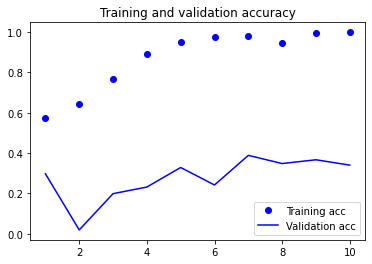

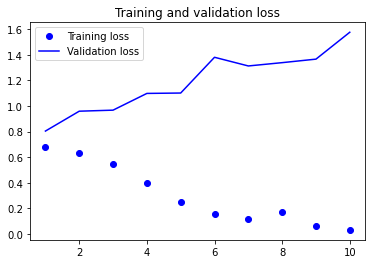

51/51 [==============================] - 1s 26ms/step - loss: 1.1585 - acc: 0.4909


[1.1585075855255127, 0.49094316363334656]

In [7]:
from keras.preprocessing import sequence
from tensorflow.python.keras.callbacks import EarlyStopping, ModelCheckpoint

max_features = 10000  # 특성으로 사용할 단어의 수

batch_size = 32
input_train = sequence.pad_sequences(train,maxlen=maxlen)
input_test = sequence.pad_sequences(test,maxlen=maxlen)

from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN

from keras.layers import Dense

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))
mc = ModelCheckpoint('best_simpleRNN.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, train_labels,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

model.evaluate(test, test_labels)

### LSTM

Epoch 1/10
40/40 [==============================] - 19s 439ms/step - loss: 0.6555 - acc: 0.6201 - val_loss: 1.0264 - val_acc: 0.0000e+00
Epoch 2/10
40/40 [==============================] - 16s 411ms/step - loss: 0.6224 - acc: 0.6363 - val_loss: 1.4201 - val_acc: 0.0023
Epoch 3/10
40/40 [==============================] - 16s 409ms/step - loss: 0.5774 - acc: 0.7199 - val_loss: 1.4752 - val_acc: 0.1272
Epoch 4/10
40/40 [==============================] - 16s 406ms/step - loss: 0.5190 - acc: 0.7777 - val_loss: 0.9867 - val_acc: 0.4442
Epoch 5/10
40/40 [==============================] - 16s 403ms/step - loss: 0.4513 - acc: 0.8098 - val_loss: 0.7828 - val_acc: 0.6050
Epoch 6/10
40/40 [==============================] - 16s 408ms/step - loss: 0.3860 - acc: 0.8438 - val_loss: 1.5467 - val_acc: 0.3037
Epoch 7/10
40/40 [==============================] - 16s 412ms/step - loss: 0.3239 - acc: 0.8791 - val_loss: 1.4132 - val_acc: 0.3638
Epoch 8/10
40/40 [==============================] - 16s 406ms/ste

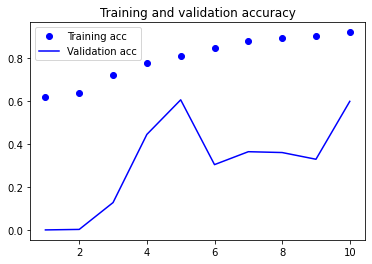

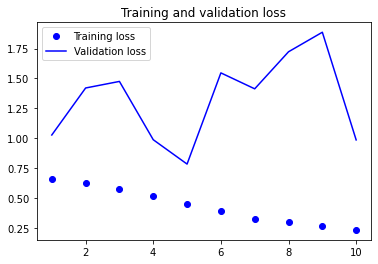

51/51 [==============================] - 3s 55ms/step - loss: 1.0914 - acc: 0.4872


[1.0914417505264282, 0.4871954917907715]

In [8]:
# LSTM
from keras.layers import LSTM
from tensorflow.python.keras.callbacks import EarlyStopping, ModelCheckpoint

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))
mc = ModelCheckpoint('best_lstm.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(input_train, train_labels,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

model.evaluate(test, test_labels)

## 공작 + 완벽한 타인

100%|██████████████████████████████████████████████████████████████████████████████| 3201/3201 [07:58<00:00,  6.69it/s]


Epoch 1/10
81/81 [==============================] - 17s 206ms/step - loss: 0.6624 - acc: 0.6152 - val_loss: 1.2433 - val_acc: 0.0000e+00
Epoch 2/10
81/81 [==============================] - 15s 192ms/step - loss: 0.5993 - acc: 0.6795 - val_loss: 1.2650 - val_acc: 0.0070
Epoch 3/10
81/81 [==============================] - 15s 188ms/step - loss: 0.4729 - acc: 0.8035 - val_loss: 1.0561 - val_acc: 0.2991
Epoch 4/10
81/81 [==============================] - 15s 189ms/step - loss: 0.3910 - acc: 0.8453 - val_loss: 1.7261 - val_acc: 0.0679
Epoch 5/10
81/81 [==============================] - 15s 189ms/step - loss: 0.2436 - acc: 0.9276 - val_loss: 1.2660 - val_acc: 0.3350
Epoch 6/10
81/81 [==============================] - 15s 189ms/step - loss: 0.1358 - acc: 0.9681 - val_loss: 1.4820 - val_acc: 0.3471
Epoch 7/10
81/81 [==============================] - 15s 189ms/step - loss: 0.0915 - acc: 0.9753 - val_loss: 1.8384 - val_acc: 0.3221
Epoch 8/10
81/81 [==============================] - 16s 192ms/ste

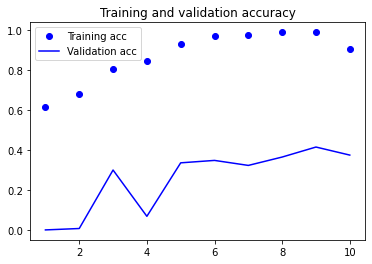

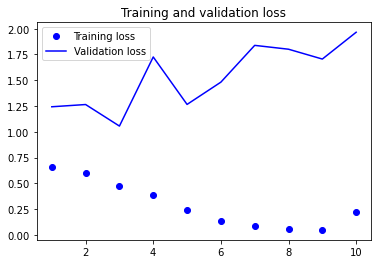

101/101 [==============================] - 3s 27ms/step - loss: 1.5553 - acc: 0.4980


[1.555331826210022, 0.497969388961792]

In [9]:
lines_t = lines1 + lines3
lines_ut = lines2 + lines4
test_t = test1 + test3
test_ut = test2 + test4

lines_ = []
test_lines_ = []
for line in lines_t:
    lines_.append(line.strip())

for line in lines_ut:
    lines_.append(line.strip())

for line in test_t:
    test_lines_.append(line.strip()) # trust
for line in test_ut:
    test_lines_.append(line.strip()) # untrust

train_labels = [] # train 데이터 label
test_labels = [] # test 데이터 label
for i in range(len(lines_t)):
    train_labels.append(0)
for j in range(len(lines_ut)):
    train_labels.append(1)
for i in range(len(test_t)):
    test_labels.append(0)
for j in range(len(test_ut)):
    test_labels.append(1)
    
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np

okt = Okt()
x_train = []
x_test = []
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

for sentence in tqdm(lines_):
    tokenized_sentence = okt.morphs(sentence, stem=True) # 토큰화
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    x_train.append(stopwords_removed_sentence)

for sentence in tqdm(test_lines_):
    tokenized_sentence = okt.morphs(sentence, stem=True) # 토큰화
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    x_test.append(stopwords_removed_sentence)

maxlen = 1000  # 100개 단어 이후는 버립니다
training_samples = 200  # 훈련 샘플은 200 -> 200개입니다
validation_samples = 10000  # 검증 샘플은 10,000개입니다
max_words = 10000  # 데이터셋에서 가장 빈도 높은 10,000개의 단어만 사용합니다
# train 토큰화
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(x_train)
sequences = tokenizer.texts_to_sequences(x_train)

word_index = tokenizer.word_index
train = pad_sequences(sequences,maxlen=maxlen)

# test 토큰화
tokenizer2 = Tokenizer(num_words=max_words)
tokenizer2.fit_on_texts(x_test)
sequences2 = tokenizer2.texts_to_sequences(x_test)

word_index2 = tokenizer2.word_index
test = pad_sequences(sequences2,maxlen=maxlen)

train_labels = np.asarray(train_labels)
test_labels = np.asarray(test_labels)

### simpleRNN

from keras.preprocessing import sequence
from tensorflow.python.keras.callbacks import EarlyStopping, ModelCheckpoint

max_features = 10000  # 특성으로 사용할 단어의 수

batch_size = 32
input_train = sequence.pad_sequences(train,maxlen=maxlen)
input_test = sequence.pad_sequences(test,maxlen=maxlen)

from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN

from keras.layers import Dense

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))
mc = ModelCheckpoint('best_simpleRNN1.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, train_labels,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

model.evaluate(test, test_labels)

### LSTM

Epoch 1/10
81/81 [==============================] - 37s 442ms/step - loss: 0.6476 - acc: 0.6228 - val_loss: 1.5889 - val_acc: 0.0016
Epoch 2/10
81/81 [==============================] - 36s 440ms/step - loss: 0.6061 - acc: 0.6804 - val_loss: 0.9358 - val_acc: 0.4190
Epoch 3/10
81/81 [==============================] - 36s 444ms/step - loss: 0.5513 - acc: 0.7275 - val_loss: 0.8728 - val_acc: 0.5303
Epoch 4/10
81/81 [==============================] - 36s 450ms/step - loss: 0.4990 - acc: 0.7718 - val_loss: 2.9976 - val_acc: 0.0141
Epoch 5/10
81/81 [==============================] - 36s 444ms/step - loss: 0.4773 - acc: 0.7855 - val_loss: 0.9992 - val_acc: 0.5209
Epoch 6/10
81/81 [==============================] - 36s 441ms/step - loss: 0.4390 - acc: 0.8131 - val_loss: 1.8135 - val_acc: 0.2276
Epoch 7/10
81/81 [==============================] - 36s 443ms/step - loss: 0.4140 - acc: 0.8250 - val_loss: 1.2623 - val_acc: 0.4389
Epoch 8/10
81/81 [==============================] - 36s 443ms/step - 

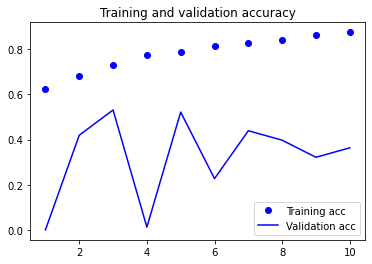

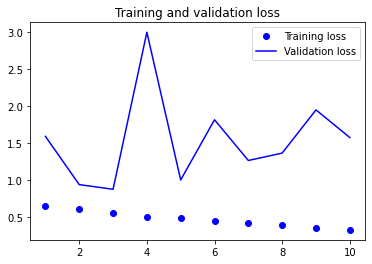

101/101 [==============================] - 6s 59ms/step - loss: 1.0736 - acc: 0.5133


[1.0735745429992676, 0.5132771134376526]

In [10]:
# LSTM
from keras.layers import LSTM
from tensorflow.python.keras.callbacks import EarlyStopping, ModelCheckpoint

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))
mc = ModelCheckpoint('best_lstm1.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(input_train, train_labels,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

model.evaluate(test, test_labels)

## 암살 + 공작 + 완벽한 타인

In [11]:
lines_t = lines1 + lines3 + lines5
lines_ut = lines2 + lines4 + lines6
test_t = test1 + test3 + test5
test_ut = test2 + test4 + test6

lines_ = []
test_lines_ = []
for line in lines_t:
    lines_.append(line.strip())

for line in lines_ut:
    lines_.append(line.strip())

for line in test_t:
    test_lines_.append(line.strip()) # trust
for line in test_ut:
    test_lines_.append(line.strip()) # untrust

train_labels = [] # train 데이터 label
test_labels = [] # test 데이터 label
for i in range(len(lines_t)):
    train_labels.append(0)
for j in range(len(lines_ut)):
    train_labels.append(1)
for i in range(len(test_t)):
    test_labels.append(0)
for j in range(len(test_ut)):
    test_labels.append(1)
    
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np

okt = Okt()
x_train = []
x_test = []
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

for sentence in tqdm(lines_):
    tokenized_sentence = okt.morphs(sentence, stem=True) # 토큰화
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    x_train.append(stopwords_removed_sentence)

for sentence in tqdm(test_lines_):
    tokenized_sentence = okt.morphs(sentence, stem=True) # 토큰화
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    x_test.append(stopwords_removed_sentence)

maxlen = 1000  # 100개 단어 이후는 버립니다
training_samples = 200  # 훈련 샘플은 200 -> 200개입니다
validation_samples = 10000  # 검증 샘플은 10,000개입니다
max_words = 10000  # 데이터셋에서 가장 빈도 높은 10,000개의 단어만 사용합니다
# train 토큰화
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(x_train)
sequences = tokenizer.texts_to_sequences(x_train)

word_index = tokenizer.word_index
train = pad_sequences(sequences,maxlen=maxlen)

# test 토큰화
tokenizer2 = Tokenizer(num_words=max_words)
tokenizer2.fit_on_texts(x_test)
sequences2 = tokenizer2.texts_to_sequences(x_test)

word_index2 = tokenizer2.word_index
test = pad_sequences(sequences2,maxlen=maxlen)

train_labels = np.asarray(train_labels)
test_labels = np.asarray(test_labels)

100%|██████████████████████████████████████████████████████████████████████████████| 4801/4801 [10:51<00:00,  7.37it/s]


### simpleRNN

Epoch 1/10
121/121 [==============================] - 24s 188ms/step - loss: 0.6575 - acc: 0.6214 - val_loss: 1.1054 - val_acc: 0.0000e+00
Epoch 2/10
121/121 [==============================] - 22s 184ms/step - loss: 0.5977 - acc: 0.6857 - val_loss: 0.8616 - val_acc: 0.4436
Epoch 3/10
121/121 [==============================] - 22s 185ms/step - loss: 0.4551 - acc: 0.8037 - val_loss: 1.1586 - val_acc: 0.3718
Epoch 4/10
121/121 [==============================] - 22s 185ms/step - loss: 0.2963 - acc: 0.8900 - val_loss: 1.2056 - val_acc: 0.4111
Epoch 5/10
121/121 [==============================] - 22s 185ms/step - loss: 0.1835 - acc: 0.9419 - val_loss: 1.3744 - val_acc: 0.4361
Epoch 6/10
121/121 [==============================] - 22s 185ms/step - loss: 0.1078 - acc: 0.9695 - val_loss: 2.2346 - val_acc: 0.2952
Epoch 7/10
121/121 [==============================] - 22s 184ms/step - loss: 0.0682 - acc: 0.9835 - val_loss: 2.1387 - val_acc: 0.3700
Epoch 8/10
121/121 [==============================]

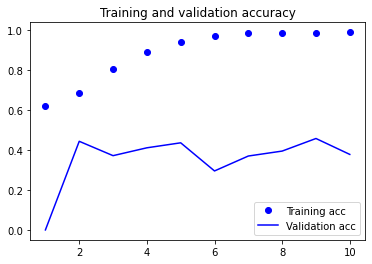

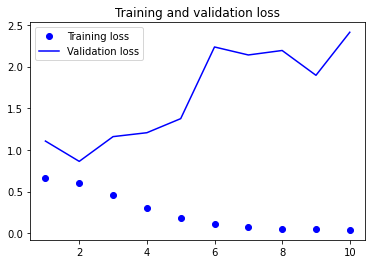

151/151 [==============================] - 4s 26ms/step - loss: 1.7788 - acc: 0.5020


[1.7788164615631104, 0.5019787549972534]

In [12]:
from keras.preprocessing import sequence
from tensorflow.python.keras.callbacks import EarlyStopping, ModelCheckpoint

max_features = 10000  # 특성으로 사용할 단어의 수

batch_size = 32
input_train = sequence.pad_sequences(train,maxlen=maxlen)
input_test = sequence.pad_sequences(test,maxlen=maxlen)

from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN

from keras.layers import Dense

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))
mc = ModelCheckpoint('best_simpleRNN2.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, train_labels,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

model.evaluate(test, test_labels)

### LSTM

Epoch 1/10
121/121 [==============================] - 51s 411ms/step - loss: 0.6416 - acc: 0.6272 - val_loss: 1.1808 - val_acc: 0.0648
Epoch 2/10
121/121 [==============================] - 49s 406ms/step - loss: 0.5969 - acc: 0.6862 - val_loss: 0.8717 - val_acc: 0.4546
Epoch 3/10
121/121 [==============================] - 49s 406ms/step - loss: 0.5516 - acc: 0.7321 - val_loss: 2.1409 - val_acc: 0.0586
Epoch 4/10
121/121 [==============================] - 49s 406ms/step - loss: 0.5160 - acc: 0.7576 - val_loss: 2.1738 - val_acc: 0.1177
Epoch 5/10
121/121 [==============================] - 49s 406ms/step - loss: 0.4879 - acc: 0.7783 - val_loss: 0.9629 - val_acc: 0.5181
Epoch 6/10
121/121 [==============================] - 49s 407ms/step - loss: 0.4635 - acc: 0.7939 - val_loss: 1.2183 - val_acc: 0.4132
Epoch 7/10
121/121 [==============================] - 49s 406ms/step - loss: 0.4721 - acc: 0.7981 - val_loss: 1.3432 - val_acc: 0.2783
Epoch 8/10
121/121 [==============================] - 4

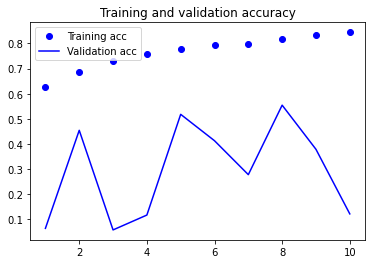

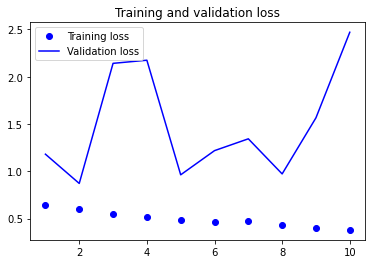

151/151 [==============================] - 9s 58ms/step - loss: 1.2742 - acc: 0.5278


[1.2741817235946655, 0.5278066992759705]

In [13]:
# LSTM
from keras.layers import LSTM
from tensorflow.python.keras.callbacks import EarlyStopping, ModelCheckpoint

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))
mc = ModelCheckpoint('best_lstm1.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(input_train, train_labels,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

model.evaluate(test, test_labels)

## 1987 + 공작 + 완벽한 타인 + 암살

In [14]:
lines_t = lines1 + lines3 + lines5 + lines7
lines_ut = lines2 + lines4 + lines6 + lines8
test_t = test1 + test3 + test5 + test7
test_ut = test2 + test4 + test6 + test8

lines_ = []
test_lines_ = []
for line in lines_t:
    lines_.append(line.strip())

for line in lines_ut:
    lines_.append(line.strip())

for line in test_t:
    test_lines_.append(line.strip()) # trust
for line in test_ut:
    test_lines_.append(line.strip()) # untrust

train_labels = [] # train 데이터 label
test_labels = [] # test 데이터 label
for i in range(len(lines_t)):
    train_labels.append(0)
for j in range(len(lines_ut)):
    train_labels.append(1)
for i in range(len(test_t)):
    test_labels.append(0)
for j in range(len(test_ut)):
    test_labels.append(1)
    
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np

okt = Okt()
x_train = []
x_test = []
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

for sentence in tqdm(lines_):
    tokenized_sentence = okt.morphs(sentence, stem=True) # 토큰화
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    x_train.append(stopwords_removed_sentence)

for sentence in tqdm(test_lines_):
    tokenized_sentence = okt.morphs(sentence, stem=True) # 토큰화
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    x_test.append(stopwords_removed_sentence)

maxlen = 1000  # 100개 단어 이후는 버립니다
training_samples = 200  # 훈련 샘플은 200 -> 200개입니다
validation_samples = 10000  # 검증 샘플은 10,000개입니다
max_words = 10000  # 데이터셋에서 가장 빈도 높은 10,000개의 단어만 사용합니다
# train 토큰화
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(x_train)
sequences = tokenizer.texts_to_sequences(x_train)

word_index = tokenizer.word_index
train = pad_sequences(sequences,maxlen=maxlen)

# test 토큰화
tokenizer2 = Tokenizer(num_words=max_words)
tokenizer2.fit_on_texts(x_test)
sequences2 = tokenizer2.texts_to_sequences(x_test)

word_index2 = tokenizer2.word_index
test = pad_sequences(sequences2,maxlen=maxlen)

train_labels = np.asarray(train_labels)
test_labels = np.asarray(test_labels)

100%|██████████████████████████████████████████████████████████████████████████████| 6401/6401 [16:55<00:00,  6.30it/s]


### simpleRNN

Epoch 1/10
161/161 [==============================] - 30s 180ms/step - loss: 0.6601 - acc: 0.6236 - val_loss: 0.8818 - val_acc: 0.0107
Epoch 2/10
161/161 [==============================] - 28s 172ms/step - loss: 0.6090 - acc: 0.6717 - val_loss: 0.9515 - val_acc: 0.2563
Epoch 3/10
161/161 [==============================] - 28s 173ms/step - loss: 0.4713 - acc: 0.7916 - val_loss: 1.3412 - val_acc: 0.1806
Epoch 4/10
161/161 [==============================] - 28s 172ms/step - loss: 0.3400 - acc: 0.8623 - val_loss: 1.4614 - val_acc: 0.2899
Epoch 5/10
161/161 [==============================] - 28s 172ms/step - loss: 0.2228 - acc: 0.9205 - val_loss: 1.6890 - val_acc: 0.3262
Epoch 6/10
161/161 [==============================] - 28s 172ms/step - loss: 0.1510 - acc: 0.9507 - val_loss: 1.5360 - val_acc: 0.4379
Epoch 7/10
161/161 [==============================] - 28s 173ms/step - loss: 0.1107 - acc: 0.9668 - val_loss: 1.7078 - val_acc: 0.4364
Epoch 8/10
161/161 [==============================] - 2

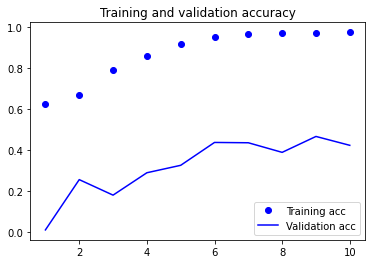

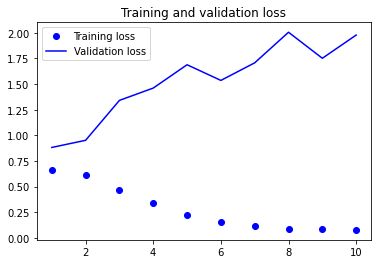

201/201 [==============================] - 5s 26ms/step - loss: 1.6534 - acc: 0.4995


[1.6533758640289307, 0.49945321679115295]

In [15]:
from keras.preprocessing import sequence
from tensorflow.python.keras.callbacks import EarlyStopping, ModelCheckpoint

max_features = 10000  # 특성으로 사용할 단어의 수

batch_size = 32
input_train = sequence.pad_sequences(train,maxlen=maxlen)
input_test = sequence.pad_sequences(test,maxlen=maxlen)

from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN

from keras.layers import Dense

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))
mc = ModelCheckpoint('best_simpleRNN3.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, train_labels,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

model.evaluate(test, test_labels)

### LSTM

Epoch 1/10
161/161 [==============================] - 68s 413ms/step - loss: 0.6516 - acc: 0.6251 - val_loss: 0.7643 - val_acc: 0.2772
Epoch 2/10
161/161 [==============================] - 66s 412ms/step - loss: 0.6185 - acc: 0.6645 - val_loss: 0.8651 - val_acc: 0.4826
Epoch 3/10
161/161 [==============================] - 66s 411ms/step - loss: 0.5768 - acc: 0.7047 - val_loss: 0.6278 - val_acc: 0.6714
Epoch 4/10
161/161 [==============================] - 66s 412ms/step - loss: 0.5406 - acc: 0.7378 - val_loss: 1.6087 - val_acc: 0.1216
Epoch 5/10
161/161 [==============================] - 66s 409ms/step - loss: 0.5159 - acc: 0.7547 - val_loss: 0.6048 - val_acc: 0.6634
Epoch 6/10
161/161 [==============================] - 66s 407ms/step - loss: 0.4832 - acc: 0.7781 - val_loss: 1.9483 - val_acc: 0.1035
Epoch 7/10
161/161 [==============================] - 66s 408ms/step - loss: 0.4546 - acc: 0.7956 - val_loss: 0.9660 - val_acc: 0.3659
Epoch 8/10
161/161 [==============================] - 6

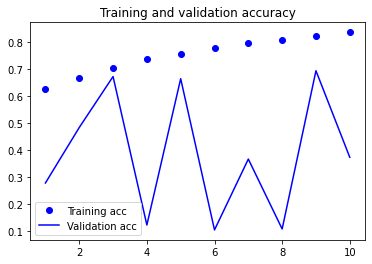

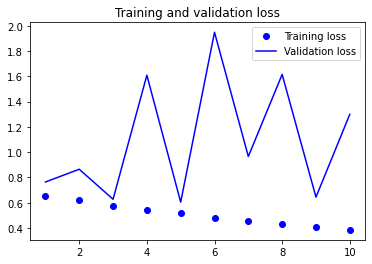

201/201 [==============================] - 11s 56ms/step - loss: 0.9966 - acc: 0.5070


[0.9965501427650452, 0.5069520473480225]

In [16]:
# LSTM
from keras.layers import LSTM
from tensorflow.python.keras.callbacks import EarlyStopping, ModelCheckpoint

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))
mc = ModelCheckpoint('best_lstm3.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(input_train, train_labels,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

model.evaluate(test, test_labels)

## 1987 + 공작 + 완벽한 타인 + 택시운전사 + 암살

In [17]:
lines_t = lines1 + lines3 + lines5 + lines7 + lines9
lines_ut = lines2 + lines4 + lines6 + lines8 + lines10
test_t = test1 + test3 + test5 + test7 + test9
test_ut = test2 + test4 + test6 + test8 + test10

lines_ = []
test_lines_ = []
for line in lines_t:
    lines_.append(line.strip())

for line in lines_ut:
    lines_.append(line.strip())

for line in test_t:
    test_lines_.append(line.strip()) # trust
for line in test_ut:
    test_lines_.append(line.strip()) # untrust

train_labels = [] # train 데이터 label
test_labels = [] # test 데이터 label
for i in range(len(lines_t)):
    train_labels.append(0)
for j in range(len(lines_ut)):
    train_labels.append(1)
for i in range(len(test_t)):
    test_labels.append(0)
for j in range(len(test_ut)):
    test_labels.append(1)
    
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np

okt = Okt()
x_train = []
x_test = []
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

for sentence in tqdm(lines_):
    tokenized_sentence = okt.morphs(sentence, stem=True) # 토큰화
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    x_train.append(stopwords_removed_sentence)

for sentence in tqdm(test_lines_):
    tokenized_sentence = okt.morphs(sentence, stem=True) # 토큰화
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    x_test.append(stopwords_removed_sentence)

maxlen = 1000  # 100개 단어 이후는 버립니다
training_samples = 200  # 훈련 샘플은 200 -> 200개입니다
validation_samples = 10000  # 검증 샘플은 10,000개입니다
max_words = 10000  # 데이터셋에서 가장 빈도 높은 10,000개의 단어만 사용합니다
# train 토큰화
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(x_train)
sequences = tokenizer.texts_to_sequences(x_train)

word_index = tokenizer.word_index
train = pad_sequences(sequences,maxlen=maxlen)

# test 토큰화
tokenizer2 = Tokenizer(num_words=max_words)
tokenizer2.fit_on_texts(x_test)
sequences2 = tokenizer2.texts_to_sequences(x_test)

word_index2 = tokenizer2.word_index
test = pad_sequences(sequences2,maxlen=maxlen)

train_labels = np.asarray(train_labels)
test_labels = np.asarray(test_labels)

100%|██████████████████████████████████████████████████████████████████████████████| 8002/8002 [22:53<00:00,  5.83it/s]


### simpleRNN

Epoch 1/10
201/201 [==============================] - 38s 178ms/step - loss: 0.6609 - acc: 0.6238 - val_loss: 1.0171 - val_acc: 0.0000e+00
Epoch 2/10
201/201 [==============================] - 35s 176ms/step - loss: 0.6166 - acc: 0.6623 - val_loss: 1.1343 - val_acc: 0.0748
Epoch 3/10
201/201 [==============================] - 35s 175ms/step - loss: 0.4893 - acc: 0.7777 - val_loss: 1.3557 - val_acc: 0.2254
Epoch 4/10
201/201 [==============================] - 35s 175ms/step - loss: 0.3471 - acc: 0.8559 - val_loss: 1.6323 - val_acc: 0.2352
Epoch 5/10
201/201 [==============================] - 35s 175ms/step - loss: 0.2426 - acc: 0.9095 - val_loss: 1.6458 - val_acc: 0.3605
Epoch 6/10
201/201 [==============================] - 35s 175ms/step - loss: 0.1740 - acc: 0.9406 - val_loss: 1.5088 - val_acc: 0.4639
Epoch 7/10
201/201 [==============================] - 35s 176ms/step - loss: 0.1290 - acc: 0.9593 - val_loss: 1.6453 - val_acc: 0.4580
Epoch 8/10
201/201 [==============================]

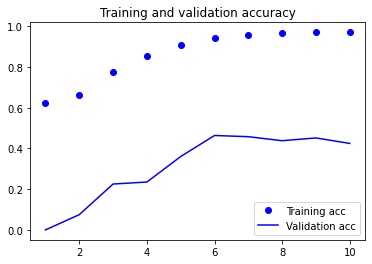

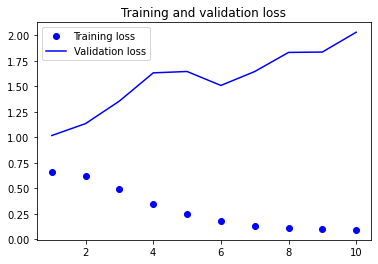

251/251 [==============================] - 6s 26ms/step - loss: 1.5985 - acc: 0.5100


[1.5985081195831299, 0.5099974870681763]

In [18]:
from keras.preprocessing import sequence
from tensorflow.python.keras.callbacks import EarlyStopping, ModelCheckpoint

max_features = 10000  # 특성으로 사용할 단어의 수

batch_size = 32
input_train = sequence.pad_sequences(train,maxlen=maxlen)
input_test = sequence.pad_sequences(test,maxlen=maxlen)

from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN

from keras.layers import Dense

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))
mc = ModelCheckpoint('best_simpleRNN4.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, train_labels,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

model.evaluate(test, test_labels)

### LSTM

Epoch 1/10
201/201 [==============================] - 85s 415ms/step - loss: 0.6532 - acc: 0.6248 - val_loss: 0.8234 - val_acc: 0.0950
Epoch 2/10
201/201 [==============================] - 83s 412ms/step - loss: 0.6180 - acc: 0.6622 - val_loss: 0.5566 - val_acc: 0.7345
Epoch 3/10
201/201 [==============================] - 83s 413ms/step - loss: 0.5894 - acc: 0.6915 - val_loss: 0.7901 - val_acc: 0.4709
Epoch 4/10
201/201 [==============================] - 83s 414ms/step - loss: 0.5641 - acc: 0.7138 - val_loss: 0.8642 - val_acc: 0.3864
Epoch 5/10
201/201 [==============================] - 82s 408ms/step - loss: 0.5456 - acc: 0.7305 - val_loss: 0.8245 - val_acc: 0.5420
Epoch 6/10
201/201 [==============================] - 81s 404ms/step - loss: 0.5294 - acc: 0.7447 - val_loss: 0.6805 - val_acc: 0.6204
Epoch 7/10
201/201 [==============================] - 81s 405ms/step - loss: 0.5127 - acc: 0.7521 - val_loss: 2.1343 - val_acc: 0.0795
Epoch 8/10
201/201 [==============================] - 8

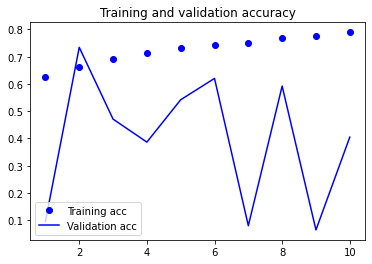

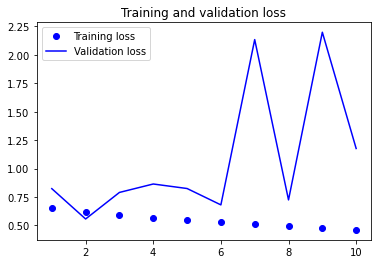

251/251 [==============================] - 13s 53ms/step - loss: 0.8580 - acc: 0.5242


[0.8580451607704163, 0.524243950843811]

In [19]:
# LSTM
from keras.layers import LSTM
from tensorflow.python.keras.callbacks import EarlyStopping, ModelCheckpoint

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))
mc = ModelCheckpoint('best_lstm4.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(input_train, train_labels,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

model.evaluate(test, test_labels)